# CLASSIFICATION

    MOH NAUFAL MIZAN SAPUTRO 1301190015

# IMPORT LIBRARY

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from math import sqrt
import matplotlib.pyplot as plt
import copy
from collections import Counter
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

# PEMROSESAN DATA

## Import Data Train

In [9]:
df = pd.read_excel('kendaraan_train.xlsx')
df.head(5)

id Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0   1        Wanita  30.0  1.0         33.0             1.0      < 1 Tahun   
1   2          Pria  48.0  1.0         39.0             0.0      > 2 Tahun   
2   3           NaN  21.0  1.0         46.0             1.0      < 1 Tahun   
3   4        Wanita  58.0  1.0         48.0             0.0      1-2 Tahun   
4   5          Pria  50.0  1.0         35.0             0.0      > 2 Tahun   

  Kendaraan_Rusak    Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0           Tidak  28029.0            152.0               97.0         0  
1          Pernah  25800.0             29.0              158.0         0  
2           Tidak  32733.0            160.0              119.0         0  
3           Tidak   2630.0            124.0               63.0         0  
4             NaN  34857.0             88.0              194.0         0

## Import Data Test

In [10]:
df_test = pd.read_excel('kendaraan_test.xlsx')
df_test.head(5)

Jenis_Kelamin  Umur  SIM  Kode_Daerah  Sudah_Asuransi Umur_Kendaraan  \
0        Wanita    49    1            8               0      1-2 Tahun   
1          Pria    22    1           47               1      < 1 Tahun   
2          Pria    24    1           28               1      < 1 Tahun   
3          Pria    46    1            8               1      1-2 Tahun   
4          Pria    35    1           23               0      1-2 Tahun   

  Kendaraan_Rusak   Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0          Pernah   46963               26                145         0  
1           Tidak   39624              152                241         0  
2           Tidak  110479              152                 62         0  
3           Tidak   36266              124                 34         0  
4          Pernah   26963              152                229         0

## Melihat Ringkasan Data

### Data Train

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
id                   285831 non-null int64
Jenis_Kelamin        271391 non-null object
Umur                 271617 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       271556 non-null object
Kendaraan_Rusak      271643 non-null object
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
Tertarik             285831 non-null int64
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


## Menghapus Kolom ID

In [12]:
df = df.drop(['id'],1)

## Mengubah Cetgorical Menjadi Numerik

**Kolom Jenis_Kelamin:** 
-  0: 'Wanita'
-  1: 'Pria'

**Kolom Umur_Kendaraan:**
 < 1 Tahun: 0
- 1-2 Tahun: 1
- \> 2 Tahun: 2

**Kolom Kendaraan_Rusak:**
- Tidak : 0
- Pernah: 1


In [13]:
df = df.replace({"Jenis_Kelamin": {'Wanita':0, 'Pria':1}}) 
df = df.replace({"Umur_Kendaraan": {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2}}) 
df = df.replace({"Kendaraan_Rusak": {'Tidak':0, 'Pernah':1}})

df_test = df_test.replace({"Jenis_Kelamin": {'Wanita':0, 'Pria':1}}) 
df_test = df_test.replace({"Umur_Kendaraan": {'< 1 Tahun':0, '1-2 Tahun':1, '> 2 Tahun':2}}) 
df_test = df_test.replace({"Kendaraan_Rusak": {'Tidak':0, 'Pernah':1}})

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 11 columns):
Jenis_Kelamin        271391 non-null float64
Umur                 271617 non-null float64
SIM                  271427 non-null float64
Kode_Daerah          271525 non-null float64
Sudah_Asuransi       271602 non-null float64
Umur_Kendaraan       271556 non-null float64
Kendaraan_Rusak      271643 non-null float64
Premi                271262 non-null float64
Kanal_Penjualan      271532 non-null float64
Lama_Berlangganan    271839 non-null float64
Tertarik             285831 non-null int64
dtypes: float64(10), int64(1)
memory usage: 24.0 MB


## Menangani Missing Values

### Cek Apakah Ada NaN Values pada Masing2 Kolom

In [15]:
print("Apakah Terdapat Data yang Kosong pada data train? ",df.isnull().values.any())

Apakah Terdapat Data yang Kosong pada data train?  True


### Cek Banyaknya NaN Values pada Masing2 Kolom

In [16]:
print("========DATA TRAIN========")
print(df.isna().sum())

========DATA TRAIN========
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


### Mengisi Missing Values (NaN)

**1. Diisi dengan Modus:**
    - Jenis_Kelamin
    - SIM
    - Sudah_Asuransi
    - Umur_Kendaraan
    - Kendaraan_Rusak
    - Kode_Daerah
    - Umur
    
<br>

**2. Diisi dengan Mean:**
    - Premi
    - Kanal_Penjualan
    - Lama_Berlangganan

In [17]:
#Data Diskrit
df['Jenis_Kelamin'].replace(np.nan, df['Jenis_Kelamin'].mode()[0], inplace=True)
df['Jenis_Kelamin'] = df['Jenis_Kelamin'].astype('float')


df['SIM'].replace(np.nan, df['SIM'].mode()[0], inplace=True)
df['SIM'] = df['SIM'].astype('float')

df['Sudah_Asuransi'].replace(np.nan, df['Sudah_Asuransi'].mode()[0], inplace=True)
df['Sudah_Asuransi'] = df['Sudah_Asuransi'].astype('float')

df['Umur_Kendaraan'].replace(np.nan, df['Umur_Kendaraan'].mode()[0], inplace=True)
df['Umur_Kendaraan'] = df['Umur_Kendaraan'].astype('float')

df['Kendaraan_Rusak'].replace(np.nan, df['Kendaraan_Rusak'].mode()[0], inplace=True)
df['Kendaraan_Rusak'] = df['Kendaraan_Rusak'].astype('float')

df['Kode_Daerah'].replace(np.nan, df['Kode_Daerah'].mode()[0], inplace=True)

df['Umur'].replace(np.nan, df['Umur'].mode()[0], inplace=True)

#Data Continu
df['Premi'].replace(np.nan, df['Premi'].mean(), inplace=True)

df['Kanal_Penjualan'].replace(np.nan, df['Kanal_Penjualan'].mean(), inplace=True)

df['Lama_Berlangganan'].replace(np.nan, df['Lama_Berlangganan'].mean(), inplace=True)

### Cek Kembali Apakah Ada Data yang Kosong 

In [18]:
print("Apakah Terdapat Data yang Kosong pada data train? ",df.isnull().values.any())

Apakah Terdapat Data yang Kosong pada data train?  False


## Outliers Handling

### Check Outliers Data Train

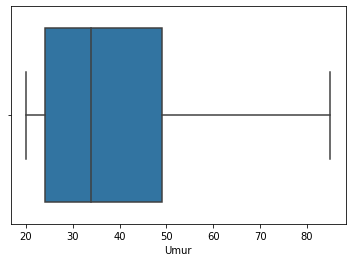

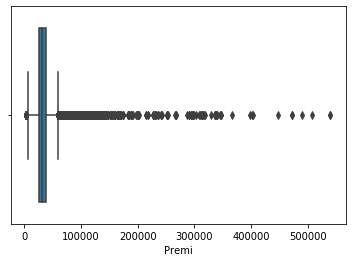

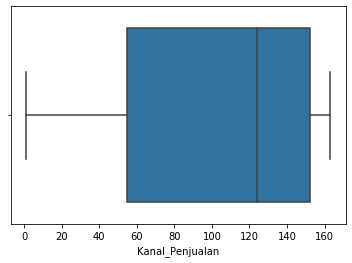

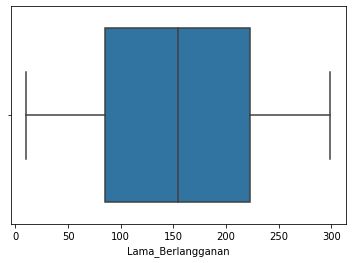

In [19]:
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Umur'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Premi'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Kanal_Penjualan'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Lama_Berlangganan'])
plt.show()

### Mengatasi Outliers

In [20]:
def interquartil(df,x):
  q1 = df[x].quantile(0.25)
  q3 = df[x].quantile(0.75)
  iqr = q3 - q1
  maximum = q3 + (1.5*iqr)
  minimum = q1 - (1.5*iqr)
  return maximum,minimum

In [21]:
def replace_outliers(df,x):
  maximum,minimum = interquartil(df,x)
  more_than = (df[x] > maximum)
  lower_than = (df[x] < minimum)
  df[x] = df[x].mask(more_than, maximum, axis=0)
  df[x] = df[x].mask(lower_than, minimum, axis=0)
  return df

In [22]:
df = replace_outliers(df,'Premi')

### Setelah Ditangani Outliers

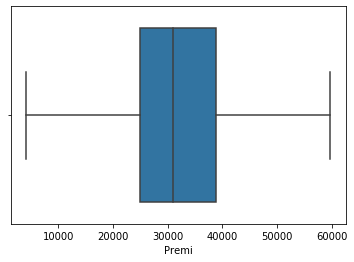

In [23]:
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['Premi'])
plt.show()

## NORMALISASI

In [24]:
for x in df.drop(['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik'],axis=1):
  df[x] = (df[x]-df[x].min())/(df[x].max()-df[x].min())

for x in df_test.drop(['Jenis_Kelamin', 'SIM', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Tertarik'],axis=1):
  df_test[x] = (df_test[x]-df_test[x].min())/(df_test[x].max()-df_test[x].min())

In [25]:
df.head(5)

Jenis_Kelamin      Umur  SIM  Kode_Daerah  Sudah_Asuransi  Umur_Kendaraan  \
0            0.0  0.153846  1.0     0.634615             1.0             0.0   
1            1.0  0.430769  1.0     0.750000             0.0             2.0   
2            1.0  0.015385  1.0     0.884615             1.0             0.0   
3            0.0  0.584615  1.0     0.923077             0.0             1.0   
4            1.0  0.461538  1.0     0.673077             0.0             2.0   

   Kendaraan_Rusak     Premi  Kanal_Penjualan  Lama_Berlangganan  Tertarik  
0              0.0  0.430691         0.932099           0.301038         0  
1              1.0  0.390647         0.172840           0.512111         0  
2              0.0  0.515198         0.981481           0.377163         0  
3              0.0  0.000000         0.759259           0.183391         0  
4              1.0  0.553356         0.537037           0.636678         0

## Melihat Banyak Label Tertarik

0    250825
1     35006
Name: Tertarik, dtype: int64


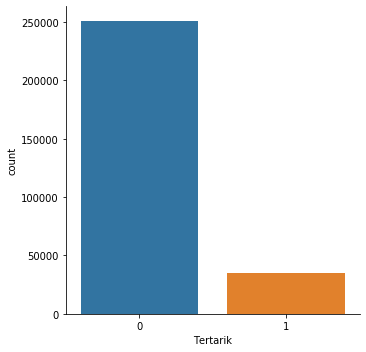

In [26]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

## DATA TRAIN

In [27]:
x_data = df.drop("Tertarik", axis=1).to_numpy()
y_data = df["Tertarik"].to_numpy()

## UNDERSAMPLING

In [28]:
undersample = NearMiss(version=1, n_neighbors=5)
x_data, y_data = undersample.fit_resample(x_data, y_data)

In [29]:
counter = Counter(y_data)
print(counter)

Counter({0: 35006, 1: 35006})


In [30]:
df_export = pd.DataFrame(x_data, columns=['Jenis_Kelamin', 'Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Umur_Kendaraan', 'Kendaraan_Rusak', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan'])
df_export.insert(loc=len(df_export.columns), column='Tertarik', value=y_data)

In [31]:
df_export

Jenis_Kelamin      Umur  SIM  Kode_Daerah  Sudah_Asuransi  \
0                1.0  0.476923  1.0     0.538462             0.0   
1                1.0  0.476923  1.0     0.538462             0.0   
2                1.0  0.476923  1.0     0.538462             0.0   
3                1.0  0.476923  1.0     0.538462             0.0   
4                1.0  0.400000  1.0     0.538462             0.0   
...              ...       ...  ...          ...             ...   
70007            1.0  0.184615  1.0     0.576923             0.0   
70008            0.0  0.169231  1.0     0.538462             0.0   
70009            0.0  0.369231  1.0     0.538462             0.0   
70010            1.0  0.323077  1.0     0.788462             0.0   
70011            1.0  0.153846  1.0     0.076923             0.0   

       Umur_Kendaraan  Kendaraan_Rusak     Premi  Kanal_Penjualan  \
0                 1.0              1.0  0.475742         0.154321   
1                 1.0              1.0  0.475742         0.154321   
2                 1.0              1.0  0.475742         0.154321   
3                 1.0              1.0  0.466729         0.154321   
4                 1.0              1.0  1.000000         0.154321   
...               ...              ...       ...              ...   
70007             0.0              1.0  0.000000         0.981481   
70008             1.0              1.0  0.000000         0.956790   
70009             1.0              1.0  0.863808         0.154321   
70010             1.0              1.0  0.446249         0.067901   
70011             0.0              1.0  0.292379         0.685318   

       Lama_Berlangganan  Tertarik  
0               0.499261         0  
1               0.499261         0  
2               0.499261         0  
3               0.499261         0  
4               0.499261         0  
...                  ...       ...  
70007           0.384083         1  
70008           0.499261         1  
70009           0.975779         1  
70010           0.480969         1  
70011           0.539792         1  

[70012 rows x 11 columns]

# EXPORT DATAFRAME TO EXCEL

In [32]:
df_export.to_excel(r'C:\Users\Mizan Saputro\1301190015_Classification\kendaraan_train_clean.xlsx', index = False)
df_test.to_excel(r'C:\Users\Mizan Saputro\1301190015_Classification\kendaraan_test_clean.xlsx', index = False)

# SPLIT DATA TRAIN

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

# TRAIN MODEL

## KNN Classification Model

### Class KNN

In [34]:
from tqdm import tqdm

class KNN:
    def __init__(self, k=5):
        self.K = k
    
    def train(self, X, y): #X adalah data, y tabel
        self.X_train = X
        self.y_train = y
    
    def predict(self, X): #X berupa matriks
        y_prediksi = []
        for i in tqdm(range(len(X))):
            y_prediksi.append(self._prediksi(X[i]))
        return np.array(y_prediksi)
    
    def _prediksi(self, x): #x adalah item
        #1. hitung jarak ke semua data training
        jarak_titik = [self.jarak(x,x_train) for x_train in self.X_train]
        #2. urutkan berdasarkan jarak terdekat
        k_terbaik = np.argsort(jarak_titik)[:self.K]
        #3. ambil label k_terbaik
        label_k_terbaik = [self.y_train[i] for i in k_terbaik]
        #4. voting yg paling banyak
        hasil_voting = Counter(label_k_terbaik).most_common(1)
        
        return hasil_voting[0][0]
    
    def jarak(self, x1, x2):
        return np.sqrt(np.sum((x1-x2)**2))

In [36]:
model_knn = KNN(k=5)
model_knn.train(x_train, y_train)
hasil_knn = model_knn.predict(x_test)
print(hasil_knn)


  0%|▎                                                                            | 67/14003 [00:43<2:19:28,  1.67it/s]


  1%|▋                                                                           | 135/14003 [01:26<2:23:53,  1.61it/s]


  1%|█                                                                           | 203/14003 [02:00<1:31:00,  2.53it/s]


  2%|█▍                                                                          | 271/14003 [02:28<1:28:41,  2.58it/s]


  2%|█▊                                                                          | 339/14003 [02:55<1:33:49,  2.43it/s]


  3%|██▏                                                                         | 407/14003 [03:23<1:32:34,  2.45it/s]


  3%|██▌                                                                         | 475/14003 [03:51<1:37:29,  2.31it/s]


  4%|██▉                                                                         | 543/14003 [04:20<1:31:05,  2.46it/s]


  4%|███▎                                                                        | 611/14003 [04:48<1:32:33,  2.41it/s]


  5%|███▋                                                                        | 679/14003 [05:16<1:28:51,  2.50it/s]


  5%|████                                                                        | 747/14003 [05:44<1:30:13,  2.45it/s]


  6%|████▍                                                                       | 815/14003 [06:12<1:30:27,  2.43it/s]


  6%|████▊                                                                       | 883/14003 [06:41<1:30:27,  2.42it/s]


  7%|█████▏                                                                      | 951/14003 [07:10<1:32:08,  2.36it/s]


  7%|█████▍                                                                     | 1019/14003 [07:36<1:24:25,  2.56it/s]


  8%|█████▊                                                                     | 1087/14003 [08:03<1:27:00,  2.47it/s]


  8%|██████▏                                                                    | 1155/14003 [08:30<1:26:03,  2.49it/s]


  9%|██████▌                                                                    | 1223/14003 [08:57<1:25:05,  2.50it/s]


  9%|██████▉                                                                    | 1291/14003 [09:24<1:23:11,  2.55it/s]


 10%|███████▎                                                                   | 1359/14003 [09:51<1:22:40,  2.55it/s]


 10%|███████▋                                                                   | 1427/14003 [10:18<1:21:04,  2.59it/s]


 11%|████████                                                                   | 1495/14003 [10:45<1:24:40,  2.46it/s]


 11%|████████▎                                                                  | 1563/14003 [11:11<1:22:17,  2.52it/s]


 12%|████████▋                                                                  | 1631/14003 [11:39<1:22:42,  2.49it/s]


 12%|█████████                                                                  | 1699/14003 [12:06<1:23:48,  2.45it/s]


 13%|█████████▍                                                                 | 1767/14003 [12:36<1:31:51,  2.22it/s]


 13%|█████████▊                                                                 | 1835/14003 [13:08<1:24:56,  2.39it/s]


 14%|██████████▏                                                                | 1903/14003 [13:38<1:23:53,  2.40it/s]


 14%|██████████▌                                                                | 1971/14003 [14:05<1:23:21,  2.41it/s]


 15%|██████████▉                                                                | 2039/14003 [14:34<1:21:47,  2.44it/s]


 15%|███████████▎                                                               | 2107/14003 [15:02<1:21:44,  2.43it/s]


 16%|███████████▋                                                               | 2175/14003 [15:29<1:18:09,  2.52it/s]


 16%|████████████                                                               | 2243/14003 [15:58<1:26:13,  2.27it/s]


 17%|████████████▍                                                              | 2311/14003 [16:28<1:18:18,  2.49it/s]


 17%|████████████▋                                                              | 2379/14003 [16:57<1:24:48,  2.28it/s]


 17%|█████████████                                                              | 2447/14003 [17:26<1:20:48,  2.38it/s]


 18%|█████████████▍                                                             | 2515/14003 [17:55<1:21:34,  2.35it/s]


 18%|█████████████▊                                                             | 2583/14003 [18:23<1:16:41,  2.48it/s]


 19%|██████████████▏                                                            | 2651/14003 [18:51<1:20:12,  2.36it/s]


 19%|██████████████▌                                                            | 2719/14003 [19:20<1:17:33,  2.43it/s]


 20%|██████████████▉                                                            | 2787/14003 [19:48<1:15:17,  2.48it/s]


 20%|███████████████▎                                                           | 2855/14003 [20:16<1:15:57,  2.45it/s]


 21%|███████████████▋                                                           | 2923/14003 [20:45<1:21:09,  2.28it/s]


 21%|████████████████                                                           | 2991/14003 [21:13<1:16:10,  2.41it/s]


 22%|████████████████▍                                                          | 3059/14003 [21:42<1:16:40,  2.38it/s]


 22%|████████████████▋                                                          | 3127/14003 [22:10<1:13:30,  2.47it/s]


 23%|█████████████████                                                          | 3195/14003 [22:46<1:17:32,  2.32it/s]


 23%|█████████████████▍                                                         | 3263/14003 [23:13<1:10:02,  2.56it/s]


 24%|█████████████████▊                                                         | 3331/14003 [23:40<1:09:16,  2.57it/s]


 24%|██████████████████▏                                                        | 3399/14003 [24:06<1:08:29,  2.58it/s]


 25%|██████████████████▌                                                        | 3467/14003 [24:33<1:07:48,  2.59it/s]


 25%|██████████████████▉                                                        | 3535/14003 [24:59<1:08:32,  2.55it/s]


 26%|███████████████████▎                                                       | 3603/14003 [25:26<1:07:14,  2.58it/s]


 26%|███████████████████▋                                                       | 3671/14003 [25:52<1:06:48,  2.58it/s]


 27%|████████████████████                                                       | 3739/14003 [26:18<1:06:27,  2.57it/s]


 27%|████████████████████▍                                                      | 3807/14003 [26:45<1:06:23,  2.56it/s]


 28%|████████████████████▊                                                      | 3875/14003 [27:12<1:11:08,  2.37it/s]


 28%|█████████████████████                                                      | 3943/14003 [27:39<1:06:29,  2.52it/s]


 29%|█████████████████████▍                                                     | 4011/14003 [28:06<1:06:48,  2.49it/s]


 29%|█████████████████████▊                                                     | 4079/14003 [28:38<1:11:00,  2.33it/s]


 30%|██████████████████████▏                                                    | 4147/14003 [29:05<1:04:41,  2.54it/s]


 30%|██████████████████████▌                                                    | 4215/14003 [29:32<1:04:30,  2.53it/s]


 31%|██████████████████████▉                                                    | 4283/14003 [29:58<1:04:06,  2.53it/s]


 31%|███████████████████████▎                                                   | 4351/14003 [30:25<1:05:13,  2.47it/s]


 32%|███████████████████████▋                                                   | 4419/14003 [30:53<1:09:59,  2.28it/s]


 32%|████████████████████████                                                   | 4487/14003 [31:21<1:02:05,  2.55it/s]


 33%|████████████████████████▍                                                  | 4555/14003 [31:49<1:04:46,  2.43it/s]


 33%|████████████████████████▊                                                  | 4623/14003 [32:15<1:00:16,  2.59it/s]


 33%|█████████████████████████                                                  | 4691/14003 [32:41<1:00:30,  2.56it/s]


 34%|█████████████████████████▍                                                 | 4759/14003 [33:08<1:00:12,  2.56it/s]


 34%|██████████████████████████▌                                                  | 4827/14003 [33:34<58:51,  2.60it/s]


 35%|██████████████████████████▉                                                  | 4895/14003 [34:00<59:55,  2.53it/s]


 35%|███████████████████████████▎                                                 | 4963/14003 [34:27<58:38,  2.57it/s]


 36%|███████████████████████████▋                                                 | 5031/14003 [34:53<57:51,  2.58it/s]


 36%|████████████████████████████                                                 | 5099/14003 [35:19<57:17,  2.59it/s]


 37%|████████████████████████████▍                                                | 5167/14003 [35:46<57:59,  2.54it/s]


 37%|████████████████████████████▊                                                | 5235/14003 [36:12<56:18,  2.60it/s]


 38%|█████████████████████████████▏                                               | 5303/14003 [36:38<55:45,  2.60it/s]


 38%|█████████████████████████████▌                                               | 5371/14003 [37:05<55:18,  2.60it/s]


 39%|█████████████████████████████▉                                               | 5439/14003 [37:31<55:06,  2.59it/s]


 39%|██████████████████████████████▎                                              | 5507/14003 [37:57<54:34,  2.59it/s]


 40%|██████████████████████████████▋                                              | 5575/14003 [38:24<54:21,  2.58it/s]


 40%|███████████████████████████████                                              | 5643/14003 [38:50<53:33,  2.60it/s]


 41%|███████████████████████████████▍                                             | 5711/14003 [39:16<53:17,  2.59it/s]


 41%|███████████████████████████████▊                                             | 5779/14003 [39:42<53:07,  2.58it/s]


 42%|████████████████████████████████▏                                            | 5847/14003 [40:09<52:33,  2.59it/s]


 42%|████████████████████████████████▌                                            | 5915/14003 [40:35<51:17,  2.63it/s]


 43%|████████████████████████████████▉                                            | 5983/14003 [41:01<52:36,  2.54it/s]


 43%|█████████████████████████████████▎                                           | 6051/14003 [41:28<50:51,  2.61it/s]


 44%|█████████████████████████████████▋                                           | 6119/14003 [41:55<51:08,  2.57it/s]


 44%|██████████████████████████████████                                           | 6187/14003 [42:21<50:36,  2.57it/s]


 45%|██████████████████████████████████▍                                          | 6255/14003 [42:48<50:09,  2.57it/s]


 45%|██████████████████████████████████▊                                          | 6323/14003 [43:14<49:18,  2.60it/s]


 46%|███████████████████████████████████▏                                         | 6391/14003 [43:41<48:46,  2.60it/s]


 46%|███████████████████████████████████▌                                         | 6459/14003 [44:07<48:25,  2.60it/s]


 47%|███████████████████████████████████▉                                         | 6527/14003 [44:33<47:42,  2.61it/s]


 47%|████████████████████████████████████▎                                        | 6595/14003 [45:00<48:03,  2.57it/s]


 48%|████████████████████████████████████▋                                        | 6663/14003 [45:26<47:20,  2.58it/s]


 48%|█████████████████████████████████████                                        | 6731/14003 [45:52<46:23,  2.61it/s]


 49%|█████████████████████████████████████▍                                       | 6799/14003 [46:18<46:02,  2.61it/s]


 49%|█████████████████████████████████████▊                                       | 6867/14003 [46:45<46:57,  2.53it/s]


 50%|██████████████████████████████████████▏                                      | 6935/14003 [47:11<45:08,  2.61it/s]


 50%|██████████████████████████████████████▌                                      | 7003/14003 [47:37<45:20,  2.57it/s]


 50%|██████████████████████████████████████▉                                      | 7071/14003 [48:04<44:24,  2.60it/s]


 51%|███████████████████████████████████████▎                                     | 7139/14003 [48:30<43:57,  2.60it/s]


 51%|███████████████████████████████████████▋                                     | 7207/14003 [48:56<43:29,  2.60it/s]


 52%|████████████████████████████████████████                                     | 7275/14003 [49:22<43:16,  2.59it/s]


 52%|████████████████████████████████████████▍                                    | 7343/14003 [49:49<44:05,  2.52it/s]


 53%|████████████████████████████████████████▊                                    | 7411/14003 [50:15<42:12,  2.60it/s]


 53%|█████████████████████████████████████████▏                                   | 7479/14003 [50:42<41:55,  2.59it/s]


 54%|█████████████████████████████████████████▍                                   | 7547/14003 [51:08<41:21,  2.60it/s]


 54%|█████████████████████████████████████████▊                                   | 7615/14003 [51:34<41:04,  2.59it/s]


 55%|██████████████████████████████████████████▏                                  | 7683/14003 [52:01<40:28,  2.60it/s]


 55%|██████████████████████████████████████████▌                                  | 7751/14003 [52:27<40:00,  2.60it/s]


 56%|██████████████████████████████████████████▉                                  | 7819/14003 [52:53<40:13,  2.56it/s]


 56%|███████████████████████████████████████████▎                                 | 7887/14003 [53:20<39:31,  2.58it/s]


 57%|███████████████████████████████████████████▋                                 | 7955/14003 [53:46<38:56,  2.59it/s]


 57%|████████████████████████████████████████████                                 | 8023/14003 [54:12<38:25,  2.59it/s]


 58%|████████████████████████████████████████████▍                                | 8091/14003 [54:39<38:04,  2.59it/s]


 58%|████████████████████████████████████████████▊                                | 8159/14003 [55:05<37:42,  2.58it/s]


 59%|█████████████████████████████████████████████▏                               | 8227/14003 [55:31<36:59,  2.60it/s]


 59%|█████████████████████████████████████████████▌                               | 8295/14003 [55:58<36:36,  2.60it/s]


 60%|█████████████████████████████████████████████▉                               | 8363/14003 [56:24<36:32,  2.57it/s]


 60%|██████████████████████████████████████████████▎                              | 8431/14003 [56:51<36:10,  2.57it/s]


 61%|██████████████████████████████████████████████▋                              | 8499/14003 [57:18<35:26,  2.59it/s]


 61%|███████████████████████████████████████████████                              | 8567/14003 [57:44<35:01,  2.59it/s]


 62%|███████████████████████████████████████████████▍                             | 8635/14003 [58:11<34:30,  2.59it/s]


 62%|███████████████████████████████████████████████▊                             | 8703/14003 [58:37<34:21,  2.57it/s]


 63%|████████████████████████████████████████████████▏                            | 8771/14003 [59:03<33:50,  2.58it/s]


 63%|████████████████████████████████████████████████▌                            | 8839/14003 [59:30<33:59,  2.53it/s]


 64%|████████████████████████████████████████████████▉                            | 8907/14003 [59:56<32:39,  2.60it/s]


 64%|████████████████████████████████████████████████                           | 8975/14003 [1:00:22<32:46,  2.56it/s]


 65%|████████████████████████████████████████████████▍                          | 9043/14003 [1:00:49<32:06,  2.58it/s]


 65%|████████████████████████████████████████████████▊                          | 9111/14003 [1:01:15<31:36,  2.58it/s]


 66%|█████████████████████████████████████████████████▏                         | 9179/14003 [1:01:42<31:14,  2.57it/s]


 66%|█████████████████████████████████████████████████▌                         | 9247/14003 [1:02:08<30:46,  2.58it/s]


 67%|█████████████████████████████████████████████████▉                         | 9315/14003 [1:02:35<30:13,  2.59it/s]


 67%|██████████████████████████████████████████████████▎                        | 9383/14003 [1:03:01<29:53,  2.58it/s]


 67%|██████████████████████████████████████████████████▌                        | 9451/14003 [1:03:28<29:22,  2.58it/s]


 68%|██████████████████████████████████████████████████▉                        | 9519/14003 [1:03:54<28:52,  2.59it/s]


 68%|███████████████████████████████████████████████████▎                       | 9587/14003 [1:04:21<28:18,  2.60it/s]


 69%|███████████████████████████████████████████████████▋                       | 9655/14003 [1:04:48<28:03,  2.58it/s]


 69%|████████████████████████████████████████████████████                       | 9723/14003 [1:05:14<27:50,  2.56it/s]


 70%|████████████████████████████████████████████████████▍                      | 9791/14003 [1:05:40<27:41,  2.54it/s]


 70%|████████████████████████████████████████████████████▊                      | 9859/14003 [1:06:07<28:37,  2.41it/s]


 71%|█████████████████████████████████████████████████████▏                     | 9927/14003 [1:06:34<26:49,  2.53it/s]


 71%|█████████████████████████████████████████████████████▌                     | 9995/14003 [1:07:00<25:49,  2.59it/s]


 72%|█████████████████████████████████████████████████████▏                    | 10063/14003 [1:07:26<25:24,  2.58it/s]


 72%|█████████████████████████████████████████████████████▌                    | 10131/14003 [1:07:52<24:50,  2.60it/s]


 73%|█████████████████████████████████████████████████████▉                    | 10199/14003 [1:08:19<24:25,  2.60it/s]


 73%|██████████████████████████████████████████████████████▎                   | 10267/14003 [1:08:45<24:01,  2.59it/s]


 74%|██████████████████████████████████████████████████████▌                   | 10335/14003 [1:09:11<25:01,  2.44it/s]


 74%|██████████████████████████████████████████████████████▉                   | 10403/14003 [1:09:38<23:05,  2.60it/s]


 75%|███████████████████████████████████████████████████████▎                  | 10471/14003 [1:10:04<22:37,  2.60it/s]


 75%|███████████████████████████████████████████████████████▋                  | 10539/14003 [1:10:31<22:07,  2.61it/s]


 76%|████████████████████████████████████████████████████████                  | 10607/14003 [1:10:57<21:53,  2.59it/s]


 76%|████████████████████████████████████████████████████████▍                 | 10675/14003 [1:11:23<21:33,  2.57it/s]


 77%|████████████████████████████████████████████████████████▊                 | 10743/14003 [1:11:50<20:48,  2.61it/s]


 77%|█████████████████████████████████████████████████████████▏                | 10811/14003 [1:12:16<20:33,  2.59it/s]


 78%|█████████████████████████████████████████████████████████▍                | 10879/14003 [1:12:42<20:00,  2.60it/s]


 78%|█████████████████████████████████████████████████████████▊                | 10947/14003 [1:13:08<19:48,  2.57it/s]


 79%|██████████████████████████████████████████████████████████▏               | 11015/14003 [1:13:35<19:04,  2.61it/s]


 79%|██████████████████████████████████████████████████████████▌               | 11083/14003 [1:14:01<18:41,  2.60it/s]


 80%|██████████████████████████████████████████████████████████▉               | 11151/14003 [1:14:28<18:21,  2.59it/s]


 80%|███████████████████████████████████████████████████████████▎              | 11219/14003 [1:14:54<17:59,  2.58it/s]


 81%|███████████████████████████████████████████████████████████▋              | 11287/14003 [1:15:21<18:08,  2.50it/s]


 81%|████████████████████████████████████████████████████████████              | 11355/14003 [1:15:47<17:04,  2.58it/s]


 82%|████████████████████████████████████████████████████████████▎             | 11423/14003 [1:16:13<16:29,  2.61it/s]


 82%|████████████████████████████████████████████████████████████▋             | 11491/14003 [1:16:39<16:07,  2.60it/s]


 83%|█████████████████████████████████████████████████████████████             | 11559/14003 [1:17:06<15:39,  2.60it/s]


 83%|█████████████████████████████████████████████████████████████▍            | 11627/14003 [1:17:32<15:42,  2.52it/s]


 84%|█████████████████████████████████████████████████████████████▊            | 11695/14003 [1:17:58<14:44,  2.61it/s]


 84%|██████████████████████████████████████████████████████████████▏           | 11763/14003 [1:18:25<14:34,  2.56it/s]


 84%|██████████████████████████████████████████████████████████████▌           | 11831/14003 [1:18:51<13:57,  2.59it/s]


 85%|██████████████████████████████████████████████████████████████▉           | 11899/14003 [1:19:18<14:26,  2.43it/s]


 85%|███████████████████████████████████████████████████████████████▏          | 11967/14003 [1:19:44<13:11,  2.57it/s]


 86%|███████████████████████████████████████████████████████████████▌          | 12035/14003 [1:20:10<12:39,  2.59it/s]


 86%|███████████████████████████████████████████████████████████████▉          | 12103/14003 [1:20:36<12:16,  2.58it/s]


 87%|████████████████████████████████████████████████████████████████▎         | 12171/14003 [1:21:03<12:04,  2.53it/s]


 87%|████████████████████████████████████████████████████████████████▋         | 12239/14003 [1:21:29<11:19,  2.60it/s]


 88%|█████████████████████████████████████████████████████████████████         | 12307/14003 [1:21:55<10:55,  2.59it/s]


 88%|█████████████████████████████████████████████████████████████████▍        | 12375/14003 [1:22:21<10:28,  2.59it/s]


 89%|█████████████████████████████████████████████████████████████████▊        | 12443/14003 [1:22:48<09:59,  2.60it/s]


 89%|██████████████████████████████████████████████████████████████████        | 12511/14003 [1:23:14<09:34,  2.60it/s]


 90%|██████████████████████████████████████████████████████████████████▍       | 12579/14003 [1:23:41<09:08,  2.60it/s]


 90%|██████████████████████████████████████████████████████████████████▊       | 12647/14003 [1:24:07<08:44,  2.58it/s]


 91%|███████████████████████████████████████████████████████████████████▏      | 12715/14003 [1:24:33<08:24,  2.55it/s]


 91%|███████████████████████████████████████████████████████████████████▌      | 12783/14003 [1:24:59<07:48,  2.60it/s]


 92%|███████████████████████████████████████████████████████████████████▉      | 12851/14003 [1:25:26<07:25,  2.58it/s]


 92%|████████████████████████████████████████████████████████████████████▎     | 12919/14003 [1:25:52<06:55,  2.61it/s]


 93%|████████████████████████████████████████████████████████████████████▋     | 12987/14003 [1:26:18<06:36,  2.56it/s]


 93%|████████████████████████████████████████████████████████████████████▉     | 13055/14003 [1:26:45<06:17,  2.51it/s]


 94%|█████████████████████████████████████████████████████████████████████▎    | 13123/14003 [1:27:11<05:38,  2.60it/s]


 94%|█████████████████████████████████████████████████████████████████████▋    | 13191/14003 [1:27:38<05:14,  2.58it/s]


 95%|██████████████████████████████████████████████████████████████████████    | 13259/14003 [1:28:04<04:46,  2.60it/s]


 95%|██████████████████████████████████████████████████████████████████████▍   | 13327/14003 [1:28:30<04:19,  2.60it/s]


 96%|██████████████████████████████████████████████████████████████████████▊   | 13395/14003 [1:28:57<03:54,  2.60it/s]


 96%|███████████████████████████████████████████████████████████████████████▏  | 13463/14003 [1:29:23<03:27,  2.60it/s]


 97%|███████████████████████████████████████████████████████████████████████▌  | 13531/14003 [1:29:49<03:01,  2.60it/s]


 97%|███████████████████████████████████████████████████████████████████████▊  | 13599/14003 [1:30:16<02:36,  2.58it/s]


 98%|████████████████████████████████████████████████████████████████████████▏ | 13667/14003 [1:30:43<02:10,  2.57it/s]


 98%|████████████████████████████████████████████████████████████████████████▌ | 13735/14003 [1:31:09<01:43,  2.59it/s]


 99%|████████████████████████████████████████████████████████████████████████▉ | 13803/14003 [1:31:36<01:17,  2.59it/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 13871/14003 [1:32:02<00:50,  2.61it/s]


100%|█████████████████████████████████████████████████████████████████████████▋| 13939/14003 [1:32:28<00:24,  2.56it/s]


100%|██████████████████████████████████████████████████████████████████████████| 14003/14003 [1:32:53<00:00,  2.51it/s]


[1 0 0 ... 1 0 1]


### Classification Report

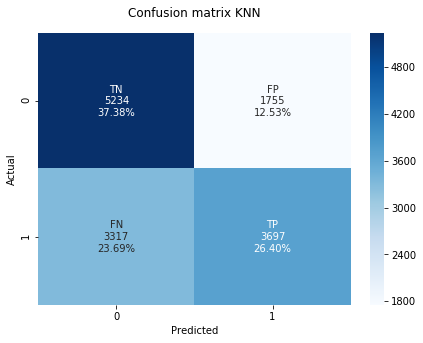

F1-Score 	: 0.5931333226375742
Recall 		: 0.5270886797832905
Precision 	: 0.6780997798972854
ROC-AUC 	: 0.6379898971959806
Accuracy 	: 0.6377919017353424



In [37]:
conf_matrix_knn = confusion_matrix(y_test, hasil_knn)

plt.figure(figsize=(7, 5))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_knn.flatten()/np.sum(conf_matrix_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix_knn, annot=labels, xticklabels=[0,1], yticklabels=[0,1], cmap='Blues', fmt='')

    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix KNN', pad=16)
plt.show()

f1 = f1_score(y_test, hasil_knn)
recall = recall_score(y_test, hasil_knn)
precision = precision_score(y_test, hasil_knn)
roc = roc_auc_score(y_test, hasil_knn)
accuracy = accuracy_score(y_test, hasil_knn)

print("F1-Score \t:", f1)
print("Recall \t\t:", recall)
print("Precision \t:", precision)
print("ROC-AUC \t:", roc)
print("Accuracy \t:", accuracy, end="\n\n")

## Decision Tree Classification Model

In [38]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

In [39]:
model_dt = DecisionTree(max_depth=7)
model_dt.fit(x_train, y_train)
hasil_dt = model_dt.predict(x_test)
print(hasil_dt)

[1 0 0 ... 1 0 0]


### Classification Report

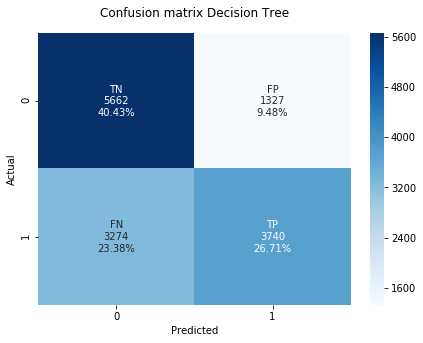

F1-Score 	: 0.619154043539442
Recall 		: 0.5332192757342458
Precision 	: 0.7381093349121768
ROC-AUC 	: 0.6716747401707429
Accuracy 	: 0.6714275512390202



In [40]:
conf_matrix_dt = confusion_matrix(y_test, hasil_dt)

plt.figure(figsize=(7, 5))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_dt.flatten()/np.sum(conf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix_dt, annot=labels, xticklabels=[0,1], yticklabels=[0,1], cmap='Blues', fmt='')

    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix Decision Tree', pad=16)
plt.show()

f1 = f1_score(y_test, hasil_dt)
recall = recall_score(y_test, hasil_dt)
precision = precision_score(y_test, hasil_dt)
roc = roc_auc_score(y_test, hasil_dt)
accuracy = accuracy_score(y_test, hasil_dt)

print("F1-Score \t:", f1)
print("Recall \t\t:", recall)
print("Precision \t:", precision)
print("ROC-AUC \t:", roc)
print("Accuracy \t:", accuracy, end="\n\n")

# Memprediksi & Evaluasi Data Test

In [41]:
x_data_test = df_test.drop("Tertarik", axis=1).to_numpy()
y_data_test = df_test["Tertarik"].to_numpy()

#Untuk KNN
hasil_knn_test = model_knn.predict(x_data_test)
print("knn_test\t: ",hasil_knn_test)

#Untuk Decision Tree
hasil_dt_test = model_dt.predict(x_data_test)
print("dt_test\t: ", hasil_dt_test)


  0%|                                                                             | 67/47639 [00:28<5:40:36,  2.33it/s]


  0%|▏                                                                           | 135/47639 [00:58<5:39:21,  2.33it/s]


  0%|▎                                                                           | 203/47639 [01:27<5:46:04,  2.28it/s]


  1%|▍                                                                           | 271/47639 [01:56<5:40:48,  2.32it/s]


  1%|▌                                                                           | 339/47639 [02:25<5:35:44,  2.35it/s]


  1%|▋                                                                           | 407/47639 [02:55<5:36:31,  2.34it/s]


  1%|▊                                                                           | 475/47639 [03:24<5:45:04,  2.28it/s]


  1%|▊                                                                           | 543/47639 [03:53<5:36:49,  2.33it/s]


  1%|▉                                                                           | 611/47639 [04:23<5:38:05,  2.32it/s]


  1%|█                                                                           | 679/47639 [04:52<5:38:39,  2.31it/s]


  2%|█▏                                                                          | 747/47639 [05:21<5:33:07,  2.35it/s]


  2%|█▎                                                                          | 815/47639 [05:51<5:40:18,  2.29it/s]


  2%|█▍                                                                          | 883/47639 [06:20<5:40:51,  2.29it/s]


  2%|█▌                                                                          | 951/47639 [06:49<5:33:13,  2.34it/s]


  2%|█▌                                                                         | 1019/47639 [07:19<5:34:23,  2.32it/s]


  2%|█▋                                                                         | 1087/47639 [07:48<5:33:45,  2.32it/s]


  2%|█▊                                                                         | 1155/47639 [08:17<5:30:44,  2.34it/s]


  3%|█▉                                                                         | 1223/47639 [08:47<5:32:33,  2.33it/s]


  3%|██                                                                         | 1291/47639 [09:16<5:31:49,  2.33it/s]


  3%|██▏                                                                        | 1359/47639 [09:45<5:31:03,  2.33it/s]


  3%|██▏                                                                        | 1427/47639 [10:15<5:36:47,  2.29it/s]


  3%|██▎                                                                        | 1495/47639 [10:44<5:34:24,  2.30it/s]


  3%|██▍                                                                        | 1563/47639 [11:14<5:30:42,  2.32it/s]


  3%|██▌                                                                        | 1631/47639 [11:43<5:28:52,  2.33it/s]


  4%|██▋                                                                        | 1699/47639 [12:12<5:31:27,  2.31it/s]


  4%|██▊                                                                        | 1767/47639 [12:42<5:30:22,  2.31it/s]


  4%|██▉                                                                        | 1835/47639 [13:11<5:28:53,  2.32it/s]


  4%|██▉                                                                        | 1903/47639 [13:40<5:29:21,  2.31it/s]


  4%|███                                                                        | 1971/47639 [14:10<5:26:59,  2.33it/s]


  4%|███▏                                                                       | 2039/47639 [14:40<5:29:15,  2.31it/s]


  4%|███▎                                                                       | 2107/47639 [15:09<5:25:12,  2.33it/s]


  5%|███▍                                                                       | 2175/47639 [15:38<5:31:21,  2.29it/s]


  5%|███▌                                                                       | 2243/47639 [16:08<5:32:29,  2.28it/s]


  5%|███▋                                                                       | 2311/47639 [16:37<5:23:51,  2.33it/s]


  5%|███▋                                                                       | 2379/47639 [17:07<5:26:26,  2.31it/s]


  5%|███▊                                                                       | 2447/47639 [17:37<5:24:51,  2.32it/s]


  5%|███▉                                                                       | 2515/47639 [18:06<5:21:25,  2.34it/s]


  5%|████                                                                       | 2583/47639 [18:35<5:22:46,  2.33it/s]


  6%|████▏                                                                      | 2651/47639 [19:04<5:23:01,  2.32it/s]


  6%|████▎                                                                      | 2719/47639 [19:34<5:21:52,  2.33it/s]


  6%|████▍                                                                      | 2787/47639 [20:03<5:22:31,  2.32it/s]


  6%|████▍                                                                      | 2855/47639 [20:33<5:22:22,  2.32it/s]


  6%|████▌                                                                      | 2923/47639 [21:02<5:21:07,  2.32it/s]


  6%|████▋                                                                      | 2991/47639 [21:32<5:22:18,  2.31it/s]


  6%|████▊                                                                      | 3059/47639 [22:01<5:19:35,  2.32it/s]


  7%|████▉                                                                      | 3127/47639 [22:30<5:21:37,  2.31it/s]


  7%|█████                                                                      | 3195/47639 [23:00<5:20:36,  2.31it/s]


  7%|█████▏                                                                     | 3263/47639 [23:29<5:18:25,  2.32it/s]


  7%|█████▏                                                                     | 3331/47639 [23:59<5:17:11,  2.33it/s]


  7%|█████▎                                                                     | 3399/47639 [24:28<5:15:39,  2.34it/s]


  7%|█████▍                                                                     | 3467/47639 [24:57<5:17:58,  2.32it/s]


  7%|█████▌                                                                     | 3535/47639 [25:27<5:14:42,  2.34it/s]


  8%|█████▋                                                                     | 3603/47639 [25:56<5:14:59,  2.33it/s]


  8%|█████▊                                                                     | 3671/47639 [26:25<5:16:19,  2.32it/s]


  8%|█████▉                                                                     | 3739/47639 [26:55<5:21:31,  2.28it/s]


  8%|█████▉                                                                     | 3807/47639 [27:24<5:14:52,  2.32it/s]


  8%|██████                                                                     | 3875/47639 [27:54<5:15:26,  2.31it/s]


  8%|██████▏                                                                    | 3943/47639 [28:23<5:16:59,  2.30it/s]


  8%|██████▎                                                                    | 4011/47639 [28:52<5:15:16,  2.31it/s]


  9%|██████▍                                                                    | 4079/47639 [29:22<5:11:59,  2.33it/s]


  9%|██████▌                                                                    | 4147/47639 [29:51<5:10:58,  2.33it/s]


  9%|██████▋                                                                    | 4215/47639 [30:20<5:14:57,  2.30it/s]


  9%|██████▋                                                                    | 4283/47639 [30:50<5:13:01,  2.31it/s]


  9%|██████▊                                                                    | 4351/47639 [31:19<5:09:03,  2.33it/s]


  9%|██████▉                                                                    | 4419/47639 [31:48<5:10:57,  2.32it/s]


  9%|███████                                                                    | 4487/47639 [32:19<5:13:22,  2.29it/s]


 10%|███████▏                                                                   | 4555/47639 [32:48<5:07:56,  2.33it/s]


 10%|███████▎                                                                   | 4623/47639 [33:17<5:09:30,  2.32it/s]


 10%|███████▍                                                                   | 4691/47639 [33:47<5:09:12,  2.31it/s]


 10%|███████▍                                                                   | 4759/47639 [34:16<5:06:50,  2.33it/s]


 10%|███████▌                                                                   | 4827/47639 [34:46<5:07:14,  2.32it/s]


 10%|███████▋                                                                   | 4895/47639 [35:15<5:03:51,  2.34it/s]


 10%|███████▊                                                                   | 4963/47639 [35:44<5:06:09,  2.32it/s]


 11%|███████▉                                                                   | 5031/47639 [36:14<5:05:52,  2.32it/s]


 11%|████████                                                                   | 5099/47639 [36:43<5:06:43,  2.31it/s]


 11%|████████▏                                                                  | 5167/47639 [37:12<5:05:06,  2.32it/s]


 11%|████████▏                                                                  | 5235/47639 [37:42<5:12:24,  2.26it/s]


 11%|████████▎                                                                  | 5303/47639 [38:11<5:07:41,  2.29it/s]


 11%|████████▍                                                                  | 5371/47639 [38:41<5:02:15,  2.33it/s]


 11%|████████▌                                                                  | 5439/47639 [39:10<5:03:07,  2.32it/s]


 12%|████████▋                                                                  | 5507/47639 [39:39<5:04:07,  2.31it/s]


 12%|████████▊                                                                  | 5575/47639 [40:09<5:05:18,  2.30it/s]


 12%|████████▉                                                                  | 5643/47639 [40:38<5:01:26,  2.32it/s]


 12%|████████▉                                                                  | 5711/47639 [41:07<4:59:17,  2.33it/s]


 12%|█████████                                                                  | 5779/47639 [41:37<4:59:36,  2.33it/s]


 12%|█████████▏                                                                 | 5847/47639 [42:06<5:00:04,  2.32it/s]


 12%|█████████▎                                                                 | 5915/47639 [42:35<4:59:45,  2.32it/s]


 13%|█████████▍                                                                 | 5983/47639 [43:05<4:59:58,  2.31it/s]


 13%|█████████▌                                                                 | 6051/47639 [43:34<4:57:15,  2.33it/s]


 13%|█████████▋                                                                 | 6119/47639 [44:04<4:59:06,  2.31it/s]


 13%|█████████▋                                                                 | 6187/47639 [44:33<4:55:51,  2.34it/s]


 13%|█████████▊                                                                 | 6255/47639 [45:02<4:55:14,  2.34it/s]


 13%|█████████▉                                                                 | 6323/47639 [45:31<4:57:44,  2.31it/s]


 13%|██████████                                                                 | 6391/47639 [46:01<4:57:46,  2.31it/s]


 14%|██████████▏                                                                | 6459/47639 [46:30<4:52:46,  2.34it/s]


 14%|██████████▎                                                                | 6527/47639 [46:59<4:52:11,  2.35it/s]


 14%|██████████▍                                                                | 6595/47639 [47:29<4:56:24,  2.31it/s]


 14%|██████████▍                                                                | 6663/47639 [47:58<4:52:33,  2.33it/s]


 14%|██████████▌                                                                | 6731/47639 [48:28<4:53:04,  2.33it/s]


 14%|██████████▋                                                                | 6799/47639 [48:57<4:52:05,  2.33it/s]


 14%|██████████▊                                                                | 6867/47639 [49:26<4:52:17,  2.32it/s]


 15%|██████████▉                                                                | 6935/47639 [49:55<4:54:10,  2.31it/s]


 15%|███████████                                                                | 7003/47639 [50:25<4:50:00,  2.34it/s]


 15%|███████████▏                                                               | 7071/47639 [50:54<4:51:29,  2.32it/s]


 15%|███████████▏                                                               | 7139/47639 [51:24<4:52:29,  2.31it/s]


 15%|███████████▎                                                               | 7207/47639 [51:53<4:52:35,  2.30it/s]


 15%|███████████▍                                                               | 7275/47639 [52:23<4:52:09,  2.30it/s]


 15%|███████████▌                                                               | 7343/47639 [52:52<4:49:59,  2.32it/s]


 16%|███████████▋                                                               | 7411/47639 [53:22<4:49:40,  2.31it/s]


 16%|███████████▊                                                               | 7479/47639 [53:51<4:52:44,  2.29it/s]


 16%|███████████▉                                                               | 7547/47639 [54:21<4:49:38,  2.31it/s]


 16%|███████████▉                                                               | 7615/47639 [54:50<4:45:38,  2.34it/s]


 16%|████████████                                                               | 7683/47639 [55:19<4:45:55,  2.33it/s]


 16%|████████████▏                                                              | 7751/47639 [55:49<4:47:16,  2.31it/s]


 16%|████████████▎                                                              | 7819/47639 [56:18<4:47:32,  2.31it/s]


 17%|████████████▍                                                              | 7887/47639 [56:47<4:52:49,  2.26it/s]


 17%|████████████▌                                                              | 7955/47639 [57:17<4:46:13,  2.31it/s]


 17%|████████████▋                                                              | 8023/47639 [57:46<4:44:56,  2.32it/s]


 17%|████████████▋                                                              | 8091/47639 [58:16<4:49:55,  2.27it/s]


 17%|████████████▊                                                              | 8159/47639 [58:45<4:45:58,  2.30it/s]


 17%|████████████▉                                                              | 8227/47639 [59:15<4:41:14,  2.34it/s]


 17%|█████████████                                                              | 8295/47639 [59:44<4:48:52,  2.27it/s]


 18%|████████████▊                                                            | 8363/47639 [1:00:13<4:41:27,  2.33it/s]


 18%|████████████▉                                                            | 8431/47639 [1:00:43<4:42:30,  2.31it/s]


 18%|█████████████                                                            | 8499/47639 [1:01:13<4:40:17,  2.33it/s]


 18%|█████████████▏                                                           | 8567/47639 [1:01:42<4:41:01,  2.32it/s]


 18%|█████████████▏                                                           | 8635/47639 [1:02:12<4:40:24,  2.32it/s]


 18%|█████████████▎                                                           | 8703/47639 [1:02:41<4:37:39,  2.34it/s]


 18%|█████████████▍                                                           | 8771/47639 [1:03:10<4:43:44,  2.28it/s]


 19%|█████████████▌                                                           | 8839/47639 [1:03:40<4:36:56,  2.33it/s]


 19%|█████████████▋                                                           | 8907/47639 [1:04:09<4:38:12,  2.32it/s]


 19%|█████████████▊                                                           | 8975/47639 [1:04:38<4:39:36,  2.30it/s]


 19%|█████████████▊                                                           | 9043/47639 [1:05:08<4:36:45,  2.32it/s]


 19%|█████████████▉                                                           | 9111/47639 [1:05:37<4:35:14,  2.33it/s]


 19%|██████████████                                                           | 9179/47639 [1:06:07<4:34:14,  2.34it/s]


 19%|██████████████▏                                                          | 9247/47639 [1:06:36<4:34:23,  2.33it/s]


 20%|██████████████▎                                                          | 9315/47639 [1:07:05<4:36:07,  2.31it/s]


 20%|██████████████▍                                                          | 9383/47639 [1:07:35<4:35:27,  2.31it/s]


 20%|██████████████▍                                                          | 9451/47639 [1:08:04<4:35:01,  2.31it/s]


 20%|██████████████▌                                                          | 9519/47639 [1:08:33<4:33:21,  2.32it/s]


 20%|██████████████▋                                                          | 9587/47639 [1:09:03<4:31:55,  2.33it/s]


 20%|██████████████▊                                                          | 9655/47639 [1:09:32<4:36:31,  2.29it/s]


 20%|██████████████▉                                                          | 9723/47639 [1:10:02<4:33:27,  2.31it/s]


 21%|███████████████                                                          | 9791/47639 [1:10:31<4:32:46,  2.31it/s]


 21%|███████████████                                                          | 9859/47639 [1:11:00<4:30:40,  2.33it/s]


 21%|███████████████▏                                                         | 9927/47639 [1:11:30<4:31:22,  2.32it/s]


 21%|███████████████▎                                                         | 9995/47639 [1:12:00<4:28:47,  2.33it/s]


 21%|███████████████▏                                                        | 10063/47639 [1:12:29<4:35:18,  2.27it/s]


 21%|███████████████▎                                                        | 10131/47639 [1:12:59<4:33:24,  2.29it/s]


 21%|███████████████▍                                                        | 10199/47639 [1:13:28<4:29:43,  2.31it/s]


 22%|███████████████▌                                                        | 10267/47639 [1:13:57<4:29:21,  2.31it/s]


 22%|███████████████▌                                                        | 10335/47639 [1:14:27<4:35:12,  2.26it/s]


 22%|███████████████▋                                                        | 10403/47639 [1:14:56<4:25:35,  2.34it/s]


 22%|███████████████▊                                                        | 10471/47639 [1:15:25<4:23:48,  2.35it/s]


 22%|███████████████▉                                                        | 10539/47639 [1:15:55<4:29:36,  2.29it/s]


 22%|████████████████                                                        | 10607/47639 [1:16:24<4:27:06,  2.31it/s]


 22%|████████████████▏                                                       | 10675/47639 [1:16:54<4:54:11,  2.09it/s]


 23%|████████████████▏                                                       | 10743/47639 [1:17:24<4:23:13,  2.34it/s]


 23%|████████████████▎                                                       | 10811/47639 [1:17:54<4:25:33,  2.31it/s]


 23%|████████████████▍                                                       | 10879/47639 [1:18:23<4:25:04,  2.31it/s]


 23%|████████████████▌                                                       | 10947/47639 [1:18:52<4:25:36,  2.30it/s]


 23%|████████████████▋                                                       | 11015/47639 [1:19:22<4:25:59,  2.29it/s]


 23%|████████████████▊                                                       | 11083/47639 [1:19:51<4:27:42,  2.28it/s]


 23%|████████████████▊                                                       | 11151/47639 [1:20:21<4:26:55,  2.28it/s]


 24%|████████████████▉                                                       | 11219/47639 [1:20:50<4:23:30,  2.30it/s]


 24%|█████████████████                                                       | 11287/47639 [1:21:19<4:23:42,  2.30it/s]


 24%|█████████████████▏                                                      | 11355/47639 [1:21:49<4:20:54,  2.32it/s]


 24%|█████████████████▎                                                      | 11423/47639 [1:22:18<4:20:27,  2.32it/s]


 24%|█████████████████▎                                                      | 11491/47639 [1:22:48<4:18:32,  2.33it/s]


 24%|█████████████████▍                                                      | 11559/47639 [1:23:17<4:18:20,  2.33it/s]


 24%|█████████████████▌                                                      | 11627/47639 [1:23:46<4:18:28,  2.32it/s]


 25%|█████████████████▋                                                      | 11695/47639 [1:24:16<4:19:33,  2.31it/s]


 25%|█████████████████▊                                                      | 11763/47639 [1:24:45<4:19:25,  2.30it/s]


 25%|█████████████████▉                                                      | 11831/47639 [1:25:15<4:15:17,  2.34it/s]


 25%|█████████████████▉                                                      | 11899/47639 [1:25:44<4:15:47,  2.33it/s]


 25%|██████████████████                                                      | 11967/47639 [1:26:13<4:16:37,  2.32it/s]


 25%|██████████████████▏                                                     | 12035/47639 [1:26:43<4:14:57,  2.33it/s]


 25%|██████████████████▎                                                     | 12103/47639 [1:27:12<4:13:20,  2.34it/s]


 26%|██████████████████▍                                                     | 12171/47639 [1:27:42<4:20:02,  2.27it/s]


 26%|██████████████████▍                                                     | 12239/47639 [1:28:11<4:16:00,  2.30it/s]


 26%|██████████████████▌                                                     | 12307/47639 [1:28:41<4:18:23,  2.28it/s]


 26%|██████████████████▋                                                     | 12375/47639 [1:29:10<4:13:22,  2.32it/s]


 26%|██████████████████▊                                                     | 12443/47639 [1:29:40<4:17:12,  2.28it/s]


 26%|██████████████████▉                                                     | 12511/47639 [1:30:09<4:15:23,  2.29it/s]


 26%|███████████████████                                                     | 12579/47639 [1:30:38<4:10:52,  2.33it/s]


 27%|███████████████████                                                     | 12647/47639 [1:31:08<4:11:35,  2.32it/s]


 27%|███████████████████▏                                                    | 12715/47639 [1:31:37<4:11:27,  2.31it/s]


 27%|███████████████████▎                                                    | 12783/47639 [1:32:07<4:15:45,  2.27it/s]


 27%|███████████████████▍                                                    | 12851/47639 [1:32:36<4:10:27,  2.31it/s]


 27%|███████████████████▌                                                    | 12919/47639 [1:33:06<4:11:45,  2.30it/s]


 27%|███████████████████▋                                                    | 12987/47639 [1:33:35<4:07:56,  2.33it/s]


 27%|███████████████████▋                                                    | 13055/47639 [1:34:05<4:07:45,  2.33it/s]


 28%|███████████████████▊                                                    | 13123/47639 [1:34:34<4:07:46,  2.32it/s]


 28%|███████████████████▉                                                    | 13191/47639 [1:35:04<4:06:43,  2.33it/s]


 28%|████████████████████                                                    | 13259/47639 [1:35:33<4:05:43,  2.33it/s]


 28%|████████████████████▏                                                   | 13327/47639 [1:36:02<4:07:46,  2.31it/s]


 28%|████████████████████▏                                                   | 13395/47639 [1:36:32<4:08:04,  2.30it/s]


 28%|████████████████████▎                                                   | 13463/47639 [1:37:01<4:05:46,  2.32it/s]


 28%|████████████████████▍                                                   | 13531/47639 [1:37:30<4:05:08,  2.32it/s]


 29%|████████████████████▌                                                   | 13599/47639 [1:38:00<4:03:58,  2.33it/s]


 29%|████████████████████▋                                                   | 13667/47639 [1:38:29<4:05:05,  2.31it/s]


 29%|████████████████████▊                                                   | 13735/47639 [1:38:59<4:05:13,  2.30it/s]


 29%|████████████████████▊                                                   | 13803/47639 [1:39:29<4:05:10,  2.30it/s]


 29%|████████████████████▉                                                   | 13871/47639 [1:39:58<4:03:26,  2.31it/s]


 29%|█████████████████████                                                   | 13939/47639 [1:40:27<4:02:10,  2.32it/s]


 29%|█████████████████████▏                                                  | 14007/47639 [1:40:57<4:02:30,  2.31it/s]


 30%|█████████████████████▎                                                  | 14075/47639 [1:41:26<4:00:27,  2.33it/s]


 30%|█████████████████████▍                                                  | 14143/47639 [1:41:56<3:59:28,  2.33it/s]


 30%|█████████████████████▍                                                  | 14211/47639 [1:42:25<3:59:12,  2.33it/s]


 30%|█████████████████████▌                                                  | 14279/47639 [1:42:55<4:04:12,  2.28it/s]


 30%|█████████████████████▋                                                  | 14347/47639 [1:43:24<3:56:38,  2.34it/s]


 30%|█████████████████████▊                                                  | 14415/47639 [1:43:53<3:58:31,  2.32it/s]


 30%|█████████████████████▉                                                  | 14483/47639 [1:44:23<3:59:05,  2.31it/s]


 31%|█████████████████████▉                                                  | 14551/47639 [1:44:52<3:57:57,  2.32it/s]


 31%|██████████████████████                                                  | 14619/47639 [1:45:21<3:58:06,  2.31it/s]


 31%|██████████████████████▏                                                 | 14687/47639 [1:45:51<3:59:20,  2.29it/s]


 31%|██████████████████████▎                                                 | 14755/47639 [1:46:20<4:03:50,  2.25it/s]


 31%|██████████████████████▍                                                 | 14823/47639 [1:46:50<3:55:59,  2.32it/s]


 31%|██████████████████████▌                                                 | 14891/47639 [1:47:19<3:55:55,  2.31it/s]


 31%|██████████████████████▌                                                 | 14959/47639 [1:47:49<3:54:09,  2.33it/s]


 32%|██████████████████████▋                                                 | 15027/47639 [1:48:18<3:53:14,  2.33it/s]


 32%|██████████████████████▊                                                 | 15095/47639 [1:48:48<3:53:19,  2.32it/s]


 32%|██████████████████████▉                                                 | 15163/47639 [1:49:17<3:52:01,  2.33it/s]


 32%|███████████████████████                                                 | 15231/47639 [1:49:47<3:52:33,  2.32it/s]


 32%|███████████████████████                                                 | 15299/47639 [1:50:16<3:51:11,  2.33it/s]


 32%|███████████████████████▏                                                | 15367/47639 [1:50:45<3:51:38,  2.32it/s]


 32%|███████████████████████▎                                                | 15435/47639 [1:51:15<3:53:19,  2.30it/s]


 33%|███████████████████████▍                                                | 15503/47639 [1:51:44<3:48:31,  2.34it/s]


 33%|███████████████████████▌                                                | 15571/47639 [1:52:14<3:56:34,  2.26it/s]


 33%|███████████████████████▋                                                | 15639/47639 [1:52:43<3:48:20,  2.34it/s]


 33%|███████████████████████▋                                                | 15707/47639 [1:53:12<3:48:44,  2.33it/s]


 33%|███████████████████████▊                                                | 15775/47639 [1:53:42<3:47:52,  2.33it/s]


 33%|███████████████████████▉                                                | 15843/47639 [1:54:11<3:58:35,  2.22it/s]


 33%|████████████████████████                                                | 15911/47639 [1:54:40<3:52:47,  2.27it/s]


 34%|████████████████████████▏                                               | 15979/47639 [1:55:10<3:46:56,  2.33it/s]


 34%|████████████████████████▎                                               | 16047/47639 [1:55:39<3:46:00,  2.33it/s]


 34%|████████████████████████▎                                               | 16115/47639 [1:56:09<3:46:05,  2.32it/s]


 34%|████████████████████████▍                                               | 16183/47639 [1:56:38<3:45:57,  2.32it/s]


 34%|████████████████████████▌                                               | 16251/47639 [1:57:07<3:47:17,  2.30it/s]


 34%|████████████████████████▋                                               | 16319/47639 [1:57:37<3:44:24,  2.33it/s]


 34%|████████████████████████▊                                               | 16387/47639 [1:58:06<3:43:50,  2.33it/s]


 35%|████████████████████████▊                                               | 16455/47639 [1:58:35<3:45:28,  2.31it/s]


 35%|████████████████████████▉                                               | 16523/47639 [1:59:05<3:44:11,  2.31it/s]


 35%|█████████████████████████                                               | 16591/47639 [1:59:34<3:42:02,  2.33it/s]


 35%|█████████████████████████▏                                              | 16659/47639 [2:00:03<3:41:04,  2.34it/s]


 35%|█████████████████████████▎                                              | 16727/47639 [2:00:32<3:41:41,  2.32it/s]


 35%|█████████████████████████▍                                              | 16795/47639 [2:01:02<3:45:51,  2.28it/s]


 35%|█████████████████████████▍                                              | 16863/47639 [2:01:31<3:40:21,  2.33it/s]


 36%|█████████████████████████▌                                              | 16931/47639 [2:02:01<3:46:30,  2.26it/s]


 36%|█████████████████████████▋                                              | 16999/47639 [2:02:30<3:43:32,  2.28it/s]


 36%|█████████████████████████▊                                              | 17067/47639 [2:03:00<3:39:28,  2.32it/s]


 36%|█████████████████████████▉                                              | 17135/47639 [2:03:29<3:40:19,  2.31it/s]


 36%|██████████████████████████                                              | 17203/47639 [2:03:59<3:41:49,  2.29it/s]


 36%|██████████████████████████                                              | 17271/47639 [2:04:28<3:38:27,  2.32it/s]


 36%|██████████████████████████▏                                             | 17339/47639 [2:04:58<3:43:01,  2.26it/s]


 37%|██████████████████████████▎                                             | 17407/47639 [2:05:27<3:37:03,  2.32it/s]


 37%|██████████████████████████▍                                             | 17475/47639 [2:05:57<3:38:29,  2.30it/s]


 37%|██████████████████████████▌                                             | 17543/47639 [2:06:26<3:35:22,  2.33it/s]


 37%|██████████████████████████▌                                             | 17611/47639 [2:06:55<3:35:47,  2.32it/s]


 37%|██████████████████████████▋                                             | 17679/47639 [2:07:25<3:42:24,  2.25it/s]


 37%|██████████████████████████▊                                             | 17747/47639 [2:07:55<3:35:19,  2.31it/s]


 37%|██████████████████████████▉                                             | 17815/47639 [2:08:24<3:36:20,  2.30it/s]


 38%|███████████████████████████                                             | 17883/47639 [2:08:54<3:35:23,  2.30it/s]


 38%|███████████████████████████▏                                            | 17951/47639 [2:09:23<3:31:45,  2.34it/s]


 38%|███████████████████████████▏                                            | 18019/47639 [2:09:53<4:05:18,  2.01it/s]


 38%|███████████████████████████▎                                            | 18087/47639 [2:10:24<3:30:26,  2.34it/s]


 38%|███████████████████████████▍                                            | 18155/47639 [2:10:54<3:33:26,  2.30it/s]


 38%|███████████████████████████▌                                            | 18223/47639 [2:11:23<3:30:04,  2.33it/s]


 38%|███████████████████████████▋                                            | 18291/47639 [2:11:52<3:29:51,  2.33it/s]


 39%|███████████████████████████▋                                            | 18359/47639 [2:12:22<3:32:19,  2.30it/s]


 39%|███████████████████████████▊                                            | 18427/47639 [2:12:51<3:33:53,  2.28it/s]


 39%|███████████████████████████▉                                            | 18495/47639 [2:13:20<3:30:23,  2.31it/s]


 39%|████████████████████████████                                            | 18563/47639 [2:13:50<3:28:47,  2.32it/s]


 39%|████████████████████████████▏                                           | 18631/47639 [2:14:19<3:30:58,  2.29it/s]


 39%|████████████████████████████▎                                           | 18699/47639 [2:14:49<3:27:08,  2.33it/s]


 39%|████████████████████████████▎                                           | 18767/47639 [2:15:18<3:25:39,  2.34it/s]


 40%|████████████████████████████▍                                           | 18835/47639 [2:15:47<3:27:15,  2.32it/s]


 40%|████████████████████████████▌                                           | 18903/47639 [2:16:17<3:25:22,  2.33it/s]


 40%|████████████████████████████▋                                           | 18971/47639 [2:16:46<3:25:05,  2.33it/s]


 40%|████████████████████████████▊                                           | 19039/47639 [2:17:15<3:27:18,  2.30it/s]


 40%|████████████████████████████▉                                           | 19107/47639 [2:17:45<3:24:09,  2.33it/s]


 40%|████████████████████████████▉                                           | 19175/47639 [2:18:14<3:25:55,  2.30it/s]


 40%|█████████████████████████████                                           | 19243/47639 [2:18:44<3:24:02,  2.32it/s]


 41%|█████████████████████████████▏                                          | 19311/47639 [2:19:13<3:23:22,  2.32it/s]


 41%|█████████████████████████████▎                                          | 19379/47639 [2:19:43<3:22:13,  2.33it/s]


 41%|█████████████████████████████▍                                          | 19447/47639 [2:20:12<3:21:11,  2.34it/s]


 41%|█████████████████████████████▍                                          | 19515/47639 [2:20:41<3:27:04,  2.26it/s]


 41%|█████████████████████████████▌                                          | 19583/47639 [2:21:11<3:21:54,  2.32it/s]


 41%|█████████████████████████████▋                                          | 19651/47639 [2:21:40<3:20:44,  2.32it/s]


 41%|█████████████████████████████▊                                          | 19719/47639 [2:22:10<3:21:32,  2.31it/s]


 42%|█████████████████████████████▉                                          | 19787/47639 [2:22:40<3:20:12,  2.32it/s]


 42%|██████████████████████████████                                          | 19855/47639 [2:23:10<3:23:51,  2.27it/s]


 42%|██████████████████████████████                                          | 19923/47639 [2:23:39<3:21:33,  2.29it/s]


 42%|██████████████████████████████▏                                         | 19991/47639 [2:24:08<3:20:23,  2.30it/s]


 42%|██████████████████████████████▎                                         | 20059/47639 [2:24:38<3:19:04,  2.31it/s]


 42%|██████████████████████████████▍                                         | 20127/47639 [2:25:07<3:17:16,  2.32it/s]


 42%|██████████████████████████████▌                                         | 20195/47639 [2:25:36<3:17:21,  2.32it/s]


 43%|██████████████████████████████▌                                         | 20263/47639 [2:26:06<3:16:07,  2.33it/s]


 43%|██████████████████████████████▋                                         | 20331/47639 [2:26:35<3:17:15,  2.31it/s]


 43%|██████████████████████████████▊                                         | 20399/47639 [2:27:04<3:16:04,  2.32it/s]


 43%|██████████████████████████████▉                                         | 20467/47639 [2:27:34<3:14:13,  2.33it/s]


 43%|███████████████████████████████                                         | 20535/47639 [2:28:03<3:14:53,  2.32it/s]


 43%|███████████████████████████████▏                                        | 20603/47639 [2:28:33<3:15:36,  2.30it/s]


 43%|███████████████████████████████▏                                        | 20671/47639 [2:29:02<3:21:48,  2.23it/s]


 44%|███████████████████████████████▎                                        | 20739/47639 [2:29:31<3:12:29,  2.33it/s]


 44%|███████████████████████████████▍                                        | 20807/47639 [2:30:01<3:11:59,  2.33it/s]


 44%|███████████████████████████████▌                                        | 20875/47639 [2:30:30<3:12:08,  2.32it/s]


 44%|███████████████████████████████▋                                        | 20943/47639 [2:30:59<3:11:11,  2.33it/s]


 44%|███████████████████████████████▊                                        | 21011/47639 [2:31:29<3:09:51,  2.34it/s]


 44%|███████████████████████████████▊                                        | 21079/47639 [2:31:58<3:09:34,  2.34it/s]


 44%|███████████████████████████████▉                                        | 21147/47639 [2:32:27<3:11:21,  2.31it/s]


 45%|████████████████████████████████                                        | 21215/47639 [2:32:57<3:09:01,  2.33it/s]


 45%|████████████████████████████████▏                                       | 21283/47639 [2:33:26<3:08:12,  2.33it/s]


 45%|████████████████████████████████▎                                       | 21351/47639 [2:33:55<3:08:21,  2.33it/s]


 45%|████████████████████████████████▎                                       | 21419/47639 [2:34:25<3:10:01,  2.30it/s]


 45%|████████████████████████████████▍                                       | 21487/47639 [2:34:54<3:08:14,  2.32it/s]


 45%|████████████████████████████████▌                                       | 21555/47639 [2:35:23<3:06:28,  2.33it/s]


 45%|████████████████████████████████▋                                       | 21623/47639 [2:35:53<3:05:38,  2.34it/s]


 46%|████████████████████████████████▊                                       | 21691/47639 [2:36:22<3:06:52,  2.31it/s]


 46%|████████████████████████████████▉                                       | 21759/47639 [2:36:51<3:05:32,  2.32it/s]


 46%|████████████████████████████████▉                                       | 21827/47639 [2:37:21<3:05:07,  2.32it/s]


 46%|█████████████████████████████████                                       | 21895/47639 [2:37:50<3:04:39,  2.32it/s]


 46%|█████████████████████████████████▏                                      | 21963/47639 [2:38:19<3:09:27,  2.26it/s]


 46%|█████████████████████████████████▎                                      | 22031/47639 [2:38:49<3:03:05,  2.33it/s]


 46%|█████████████████████████████████▍                                      | 22099/47639 [2:39:18<3:02:33,  2.33it/s]


 47%|█████████████████████████████████▌                                      | 22167/47639 [2:39:47<3:03:17,  2.32it/s]


 47%|█████████████████████████████████▌                                      | 22235/47639 [2:40:16<3:01:56,  2.33it/s]


 47%|█████████████████████████████████▋                                      | 22303/47639 [2:40:46<3:02:56,  2.31it/s]


 47%|█████████████████████████████████▊                                      | 22371/47639 [2:41:15<3:02:12,  2.31it/s]


 47%|█████████████████████████████████▉                                      | 22439/47639 [2:41:45<3:05:01,  2.27it/s]


 47%|██████████████████████████████████                                      | 22507/47639 [2:42:14<3:00:09,  2.32it/s]


 47%|██████████████████████████████████                                      | 22575/47639 [2:42:43<2:59:03,  2.33it/s]


 48%|██████████████████████████████████▏                                     | 22643/47639 [2:43:12<2:58:41,  2.33it/s]


 48%|██████████████████████████████████▎                                     | 22711/47639 [2:43:42<2:59:53,  2.31it/s]


 48%|██████████████████████████████████▍                                     | 22779/47639 [2:44:11<2:57:26,  2.34it/s]


 48%|██████████████████████████████████▌                                     | 22847/47639 [2:44:40<2:58:35,  2.31it/s]


 48%|██████████████████████████████████▋                                     | 22915/47639 [2:45:10<2:57:10,  2.33it/s]


 48%|██████████████████████████████████▋                                     | 22983/47639 [2:45:39<2:58:42,  2.30it/s]


 48%|██████████████████████████████████▊                                     | 23051/47639 [2:46:08<2:55:18,  2.34it/s]


 49%|██████████████████████████████████▉                                     | 23119/47639 [2:46:38<2:57:15,  2.31it/s]


 49%|███████████████████████████████████                                     | 23187/47639 [2:47:07<2:55:20,  2.32it/s]


 49%|███████████████████████████████████▏                                    | 23255/47639 [2:47:37<2:53:51,  2.34it/s]


 49%|███████████████████████████████████▏                                    | 23323/47639 [2:48:06<2:53:39,  2.33it/s]


 49%|███████████████████████████████████▎                                    | 23391/47639 [2:48:35<2:53:35,  2.33it/s]


 49%|███████████████████████████████████▍                                    | 23459/47639 [2:49:05<2:53:27,  2.32it/s]


 49%|███████████████████████████████████▌                                    | 23527/47639 [2:49:34<2:53:25,  2.32it/s]


 50%|███████████████████████████████████▋                                    | 23595/47639 [2:50:04<2:52:00,  2.33it/s]


 50%|███████████████████████████████████▊                                    | 23663/47639 [2:50:33<2:53:12,  2.31it/s]


 50%|███████████████████████████████████▊                                    | 23731/47639 [2:51:02<2:49:59,  2.34it/s]


 50%|███████████████████████████████████▉                                    | 23799/47639 [2:51:31<2:51:27,  2.32it/s]


 50%|████████████████████████████████████                                    | 23867/47639 [2:52:01<2:50:02,  2.33it/s]


 50%|████████████████████████████████████▏                                   | 23935/47639 [2:52:30<2:51:33,  2.30it/s]


 50%|████████████████████████████████████▎                                   | 24003/47639 [2:52:59<2:50:34,  2.31it/s]


 51%|████████████████████████████████████▍                                   | 24071/47639 [2:53:29<2:48:58,  2.32it/s]


 51%|████████████████████████████████████▍                                   | 24139/47639 [2:53:58<2:48:01,  2.33it/s]


 51%|████████████████████████████████████▌                                   | 24207/47639 [2:54:27<2:50:26,  2.29it/s]


 51%|████████████████████████████████████▋                                   | 24275/47639 [2:54:57<2:47:30,  2.32it/s]


 51%|████████████████████████████████████▊                                   | 24343/47639 [2:55:26<2:47:10,  2.32it/s]


 51%|████████████████████████████████████▉                                   | 24411/47639 [2:55:55<2:45:58,  2.33it/s]


 51%|████████████████████████████████████▉                                   | 24479/47639 [2:56:24<2:45:38,  2.33it/s]


 52%|█████████████████████████████████████                                   | 24547/47639 [2:56:54<2:45:44,  2.32it/s]


 52%|█████████████████████████████████████▏                                  | 24615/47639 [2:57:23<2:46:51,  2.30it/s]


 52%|█████████████████████████████████████▎                                  | 24683/47639 [2:57:52<2:44:17,  2.33it/s]


 52%|█████████████████████████████████████▍                                  | 24751/47639 [2:58:22<2:46:17,  2.29it/s]


 52%|█████████████████████████████████████▌                                  | 24819/47639 [2:58:51<2:43:02,  2.33it/s]


 52%|█████████████████████████████████████▌                                  | 24887/47639 [2:59:20<2:41:27,  2.35it/s]


 52%|█████████████████████████████████████▋                                  | 24955/47639 [2:59:49<2:43:06,  2.32it/s]


 53%|█████████████████████████████████████▊                                  | 25023/47639 [3:00:19<2:42:15,  2.32it/s]


 53%|█████████████████████████████████████▉                                  | 25091/47639 [3:00:48<2:43:14,  2.30it/s]


 53%|██████████████████████████████████████                                  | 25159/47639 [3:01:17<2:40:46,  2.33it/s]


 53%|██████████████████████████████████████▏                                 | 25227/47639 [3:01:47<2:39:51,  2.34it/s]


 53%|██████████████████████████████████████▏                                 | 25295/47639 [3:02:16<2:38:57,  2.34it/s]


 53%|██████████████████████████████████████▎                                 | 25363/47639 [3:02:45<2:40:44,  2.31it/s]


 53%|██████████████████████████████████████▍                                 | 25431/47639 [3:03:14<2:38:02,  2.34it/s]


 54%|██████████████████████████████████████▌                                 | 25499/47639 [3:03:44<2:38:32,  2.33it/s]


 54%|██████████████████████████████████████▋                                 | 25567/47639 [3:04:13<2:38:46,  2.32it/s]


 54%|██████████████████████████████████████▋                                 | 25635/47639 [3:04:42<2:38:02,  2.32it/s]


 54%|██████████████████████████████████████▊                                 | 25703/47639 [3:05:11<2:36:32,  2.34it/s]


 54%|██████████████████████████████████████▉                                 | 25771/47639 [3:05:41<2:37:34,  2.31it/s]


 54%|███████████████████████████████████████                                 | 25839/47639 [3:06:10<2:36:32,  2.32it/s]


 54%|███████████████████████████████████████▏                                | 25907/47639 [3:06:39<2:36:35,  2.31it/s]


 55%|███████████████████████████████████████▎                                | 25975/47639 [3:07:09<2:35:38,  2.32it/s]


 55%|███████████████████████████████████████▎                                | 26043/47639 [3:07:38<2:36:00,  2.31it/s]


 55%|███████████████████████████████████████▍                                | 26111/47639 [3:08:08<2:34:57,  2.32it/s]


 55%|███████████████████████████████████████▌                                | 26179/47639 [3:08:37<2:33:06,  2.34it/s]


 55%|███████████████████████████████████████▋                                | 26247/47639 [3:09:06<2:32:15,  2.34it/s]


 55%|███████████████████████████████████████▊                                | 26315/47639 [3:09:36<2:32:20,  2.33it/s]


 55%|███████████████████████████████████████▊                                | 26383/47639 [3:10:05<2:31:47,  2.33it/s]


 56%|███████████████████████████████████████▉                                | 26451/47639 [3:10:34<2:32:06,  2.32it/s]


 56%|████████████████████████████████████████                                | 26519/47639 [3:11:04<2:30:58,  2.33it/s]


 56%|████████████████████████████████████████▏                               | 26587/47639 [3:11:33<2:30:36,  2.33it/s]


 56%|████████████████████████████████████████▎                               | 26655/47639 [3:12:02<2:29:59,  2.33it/s]


 56%|████████████████████████████████████████▍                               | 26723/47639 [3:12:32<2:30:16,  2.32it/s]


 56%|████████████████████████████████████████▍                               | 26791/47639 [3:13:01<2:29:13,  2.33it/s]


 56%|████████████████████████████████████████▌                               | 26859/47639 [3:13:30<2:28:54,  2.33it/s]


 57%|████████████████████████████████████████▋                               | 26927/47639 [3:13:59<2:27:45,  2.34it/s]


 57%|████████████████████████████████████████▊                               | 26995/47639 [3:14:28<2:27:58,  2.33it/s]


 57%|████████████████████████████████████████▉                               | 27063/47639 [3:14:58<2:28:19,  2.31it/s]


 57%|█████████████████████████████████████████                               | 27131/47639 [3:15:27<2:25:45,  2.34it/s]


 57%|█████████████████████████████████████████                               | 27199/47639 [3:15:56<2:26:22,  2.33it/s]


 57%|█████████████████████████████████████████▏                              | 27267/47639 [3:16:26<2:29:11,  2.28it/s]


 57%|█████████████████████████████████████████▎                              | 27335/47639 [3:16:55<2:24:15,  2.35it/s]


 58%|█████████████████████████████████████████▍                              | 27403/47639 [3:17:24<2:25:36,  2.32it/s]


 58%|█████████████████████████████████████████▌                              | 27471/47639 [3:17:54<2:24:43,  2.32it/s]


 58%|█████████████████████████████████████████▌                              | 27539/47639 [3:18:23<2:24:00,  2.33it/s]


 58%|█████████████████████████████████████████▋                              | 27607/47639 [3:18:53<2:24:36,  2.31it/s]


 58%|█████████████████████████████████████████▊                              | 27675/47639 [3:19:22<2:23:08,  2.32it/s]


 58%|█████████████████████████████████████████▉                              | 27743/47639 [3:19:51<2:22:59,  2.32it/s]


 58%|██████████████████████████████████████████                              | 27811/47639 [3:20:21<2:22:36,  2.32it/s]


 59%|██████████████████████████████████████████▏                             | 27879/47639 [3:20:50<2:21:56,  2.32it/s]


 59%|██████████████████████████████████████████▏                             | 27947/47639 [3:21:19<2:20:33,  2.33it/s]


 59%|██████████████████████████████████████████▎                             | 28015/47639 [3:21:48<2:19:51,  2.34it/s]


 59%|██████████████████████████████████████████▍                             | 28083/47639 [3:22:18<2:24:36,  2.25it/s]


 59%|██████████████████████████████████████████▌                             | 28151/47639 [3:22:47<2:21:36,  2.29it/s]


 59%|██████████████████████████████████████████▋                             | 28219/47639 [3:23:17<2:20:04,  2.31it/s]


 59%|██████████████████████████████████████████▊                             | 28287/47639 [3:23:46<2:18:16,  2.33it/s]


 60%|██████████████████████████████████████████▊                             | 28355/47639 [3:24:15<2:19:30,  2.30it/s]


 60%|██████████████████████████████████████████▉                             | 28423/47639 [3:24:45<2:18:33,  2.31it/s]


 60%|███████████████████████████████████████████                             | 28491/47639 [3:25:14<2:21:58,  2.25it/s]


 60%|███████████████████████████████████████████▏                            | 28559/47639 [3:25:43<2:17:30,  2.31it/s]


 60%|███████████████████████████████████████████▎                            | 28627/47639 [3:26:13<2:16:48,  2.32it/s]


 60%|███████████████████████████████████████████▎                            | 28695/47639 [3:26:42<2:14:54,  2.34it/s]


 60%|███████████████████████████████████████████▍                            | 28763/47639 [3:27:11<2:15:27,  2.32it/s]


 61%|███████████████████████████████████████████▌                            | 28831/47639 [3:27:41<2:14:48,  2.33it/s]


 61%|███████████████████████████████████████████▋                            | 28899/47639 [3:28:10<2:15:16,  2.31it/s]


 61%|███████████████████████████████████████████▊                            | 28967/47639 [3:28:39<2:13:39,  2.33it/s]


 61%|███████████████████████████████████████████▉                            | 29035/47639 [3:29:09<2:13:03,  2.33it/s]


 61%|███████████████████████████████████████████▉                            | 29103/47639 [3:29:38<2:12:46,  2.33it/s]


 61%|████████████████████████████████████████████                            | 29171/47639 [3:30:08<2:11:32,  2.34it/s]


 61%|████████████████████████████████████████████▏                           | 29239/47639 [3:30:37<2:12:58,  2.31it/s]


 62%|████████████████████████████████████████████▎                           | 29307/47639 [3:31:06<2:11:32,  2.32it/s]


 62%|████████████████████████████████████████████▍                           | 29375/47639 [3:31:35<2:10:25,  2.33it/s]


 62%|████████████████████████████████████████████▍                           | 29443/47639 [3:32:05<2:10:16,  2.33it/s]


 62%|████████████████████████████████████████████▌                           | 29511/47639 [3:32:34<2:10:07,  2.32it/s]


 62%|████████████████████████████████████████████▋                           | 29579/47639 [3:33:03<2:09:20,  2.33it/s]


 62%|████████████████████████████████████████████▊                           | 29647/47639 [3:33:32<2:09:11,  2.32it/s]


 62%|████████████████████████████████████████████▉                           | 29715/47639 [3:34:02<2:07:30,  2.34it/s]


 63%|█████████████████████████████████████████████                           | 29783/47639 [3:34:31<2:08:17,  2.32it/s]


 63%|█████████████████████████████████████████████                           | 29851/47639 [3:35:00<2:06:43,  2.34it/s]


 63%|█████████████████████████████████████████████▏                          | 29919/47639 [3:35:29<2:05:29,  2.35it/s]


 63%|█████████████████████████████████████████████▎                          | 29987/47639 [3:35:59<2:05:43,  2.34it/s]


 63%|█████████████████████████████████████████████▍                          | 30055/47639 [3:36:28<2:06:51,  2.31it/s]


 63%|█████████████████████████████████████████████▌                          | 30123/47639 [3:36:57<2:05:57,  2.32it/s]


 63%|█████████████████████████████████████████████▋                          | 30191/47639 [3:37:26<2:05:13,  2.32it/s]


 64%|█████████████████████████████████████████████▋                          | 30259/47639 [3:37:56<2:06:40,  2.29it/s]


 64%|█████████████████████████████████████████████▊                          | 30327/47639 [3:38:25<2:04:09,  2.32it/s]


 64%|█████████████████████████████████████████████▉                          | 30395/47639 [3:38:54<2:03:27,  2.33it/s]


 64%|██████████████████████████████████████████████                          | 30463/47639 [3:39:24<2:02:24,  2.34it/s]


 64%|██████████████████████████████████████████████▏                         | 30531/47639 [3:39:53<2:01:50,  2.34it/s]


 64%|██████████████████████████████████████████████▏                         | 30599/47639 [3:40:22<2:02:17,  2.32it/s]


 64%|██████████████████████████████████████████████▎                         | 30667/47639 [3:40:51<2:01:14,  2.33it/s]


 65%|██████████████████████████████████████████████▍                         | 30735/47639 [3:41:21<2:03:42,  2.28it/s]


 65%|██████████████████████████████████████████████▌                         | 30803/47639 [3:41:50<2:00:35,  2.33it/s]


 65%|██████████████████████████████████████████████▋                         | 30871/47639 [3:42:19<2:00:24,  2.32it/s]


 65%|██████████████████████████████████████████████▊                         | 30939/47639 [3:42:49<2:06:22,  2.20it/s]


 65%|██████████████████████████████████████████████▊                         | 31007/47639 [3:43:18<1:59:55,  2.31it/s]


 65%|██████████████████████████████████████████████▉                         | 31075/47639 [3:43:47<1:59:04,  2.32it/s]


 65%|███████████████████████████████████████████████                         | 31143/47639 [3:44:17<1:58:48,  2.31it/s]


 66%|███████████████████████████████████████████████▏                        | 31211/47639 [3:44:46<1:57:30,  2.33it/s]


 66%|███████████████████████████████████████████████▎                        | 31279/47639 [3:45:15<1:59:12,  2.29it/s]


 66%|███████████████████████████████████████████████▍                        | 31347/47639 [3:45:45<1:55:39,  2.35it/s]


 66%|███████████████████████████████████████████████▍                        | 31415/47639 [3:46:14<1:56:22,  2.32it/s]


 66%|███████████████████████████████████████████████▌                        | 31483/47639 [3:46:43<1:55:37,  2.33it/s]


 66%|███████████████████████████████████████████████▋                        | 31551/47639 [3:47:12<1:55:46,  2.32it/s]


 66%|███████████████████████████████████████████████▊                        | 31619/47639 [3:47:42<1:53:54,  2.34it/s]


 67%|███████████████████████████████████████████████▉                        | 31687/47639 [3:48:11<1:54:44,  2.32it/s]


 67%|███████████████████████████████████████████████▉                        | 31755/47639 [3:48:40<1:53:33,  2.33it/s]


 67%|████████████████████████████████████████████████                        | 31823/47639 [3:49:10<1:53:28,  2.32it/s]


 67%|████████████████████████████████████████████████▏                       | 31891/47639 [3:49:39<1:52:05,  2.34it/s]


 67%|████████████████████████████████████████████████▎                       | 31959/47639 [3:50:08<1:51:57,  2.33it/s]


 67%|████████████████████████████████████████████████▍                       | 32027/47639 [3:50:38<1:51:28,  2.33it/s]


 67%|████████████████████████████████████████████████▌                       | 32095/47639 [3:51:07<1:51:12,  2.33it/s]


 68%|████████████████████████████████████████████████▌                       | 32163/47639 [3:51:36<1:50:54,  2.33it/s]


 68%|████████████████████████████████████████████████▋                       | 32231/47639 [3:52:06<1:49:52,  2.34it/s]


 68%|████████████████████████████████████████████████▊                       | 32299/47639 [3:52:35<1:49:37,  2.33it/s]


 68%|████████████████████████████████████████████████▉                       | 32367/47639 [3:53:05<1:49:09,  2.33it/s]


 68%|█████████████████████████████████████████████████                       | 32435/47639 [3:53:34<1:49:11,  2.32it/s]


 68%|█████████████████████████████████████████████████                       | 32503/47639 [3:54:03<1:48:16,  2.33it/s]


 68%|█████████████████████████████████████████████████▏                      | 32571/47639 [3:54:33<1:48:29,  2.31it/s]


 69%|█████████████████████████████████████████████████▎                      | 32639/47639 [3:55:02<1:47:51,  2.32it/s]


 69%|█████████████████████████████████████████████████▍                      | 32707/47639 [3:55:31<1:49:43,  2.27it/s]


 69%|█████████████████████████████████████████████████▌                      | 32775/47639 [3:56:01<1:46:39,  2.32it/s]


 69%|█████████████████████████████████████████████████▋                      | 32843/47639 [3:56:30<1:46:21,  2.32it/s]


 69%|█████████████████████████████████████████████████▋                      | 32911/47639 [3:56:59<1:45:16,  2.33it/s]


 69%|█████████████████████████████████████████████████▊                      | 32979/47639 [3:57:29<1:44:58,  2.33it/s]


 69%|█████████████████████████████████████████████████▉                      | 33047/47639 [3:57:58<1:45:12,  2.31it/s]


 70%|██████████████████████████████████████████████████                      | 33115/47639 [3:58:28<1:45:36,  2.29it/s]


 70%|██████████████████████████████████████████████████▏                     | 33183/47639 [3:58:57<1:45:13,  2.29it/s]


 70%|██████████████████████████████████████████████████▎                     | 33251/47639 [3:59:26<1:42:43,  2.33it/s]


 70%|██████████████████████████████████████████████████▎                     | 33319/47639 [3:59:55<1:42:54,  2.32it/s]


 70%|██████████████████████████████████████████████████▍                     | 33387/47639 [4:00:25<1:42:05,  2.33it/s]


 70%|██████████████████████████████████████████████████▌                     | 33455/47639 [4:00:54<1:41:41,  2.32it/s]


 70%|██████████████████████████████████████████████████▋                     | 33523/47639 [4:01:24<1:40:38,  2.34it/s]


 71%|██████████████████████████████████████████████████▊                     | 33591/47639 [4:01:53<1:41:07,  2.32it/s]


 71%|██████████████████████████████████████████████████▊                     | 33659/47639 [4:02:22<1:41:24,  2.30it/s]


 71%|██████████████████████████████████████████████████▉                     | 33727/47639 [4:02:51<1:40:06,  2.32it/s]


 71%|███████████████████████████████████████████████████                     | 33795/47639 [4:03:21<1:39:16,  2.32it/s]


 71%|███████████████████████████████████████████████████▏                    | 33863/47639 [4:03:50<1:40:16,  2.29it/s]


 71%|███████████████████████████████████████████████████▎                    | 33931/47639 [4:04:19<1:39:30,  2.30it/s]


 71%|███████████████████████████████████████████████████▍                    | 33999/47639 [4:04:49<1:37:53,  2.32it/s]


 72%|███████████████████████████████████████████████████▍                    | 34067/47639 [4:05:18<1:37:43,  2.31it/s]


 72%|███████████████████████████████████████████████████▌                    | 34135/47639 [4:05:47<1:36:12,  2.34it/s]


 72%|███████████████████████████████████████████████████▋                    | 34203/47639 [4:06:16<1:35:32,  2.34it/s]


 72%|███████████████████████████████████████████████████▊                    | 34271/47639 [4:06:46<1:35:19,  2.34it/s]


 72%|███████████████████████████████████████████████████▉                    | 34339/47639 [4:07:15<1:35:43,  2.32it/s]


 72%|████████████████████████████████████████████████████                    | 34407/47639 [4:07:44<1:34:57,  2.32it/s]


 72%|████████████████████████████████████████████████████                    | 34475/47639 [4:08:14<1:34:15,  2.33it/s]


 73%|████████████████████████████████████████████████████▏                   | 34543/47639 [4:08:43<1:33:55,  2.32it/s]


 73%|████████████████████████████████████████████████████▎                   | 34611/47639 [4:09:13<1:33:09,  2.33it/s]


 73%|████████████████████████████████████████████████████▍                   | 34679/47639 [4:09:42<1:32:42,  2.33it/s]


 73%|████████████████████████████████████████████████████▌                   | 34747/47639 [4:10:11<1:32:43,  2.32it/s]


 73%|████████████████████████████████████████████████████▌                   | 34815/47639 [4:10:41<1:32:55,  2.30it/s]


 73%|████████████████████████████████████████████████████▋                   | 34883/47639 [4:11:10<1:31:44,  2.32it/s]


 73%|████████████████████████████████████████████████████▊                   | 34951/47639 [4:11:39<1:30:30,  2.34it/s]


 74%|████████████████████████████████████████████████████▉                   | 35019/47639 [4:12:11<1:35:01,  2.21it/s]


 74%|█████████████████████████████████████████████████████                   | 35087/47639 [4:12:40<1:30:42,  2.31it/s]


 74%|█████████████████████████████████████████████████████▏                  | 35155/47639 [4:13:09<1:29:06,  2.34it/s]


 74%|█████████████████████████████████████████████████████▏                  | 35223/47639 [4:13:39<1:31:01,  2.27it/s]


 74%|█████████████████████████████████████████████████████▎                  | 35291/47639 [4:14:08<1:28:22,  2.33it/s]


 74%|█████████████████████████████████████████████████████▍                  | 35359/47639 [4:14:38<1:28:38,  2.31it/s]


 74%|█████████████████████████████████████████████████████▌                  | 35427/47639 [4:15:07<1:27:35,  2.32it/s]


 75%|█████████████████████████████████████████████████████▋                  | 35495/47639 [4:15:37<1:27:27,  2.31it/s]


 75%|█████████████████████████████████████████████████████▋                  | 35563/47639 [4:16:06<1:28:39,  2.27it/s]


 75%|█████████████████████████████████████████████████████▊                  | 35631/47639 [4:16:36<1:26:00,  2.33it/s]


 75%|█████████████████████████████████████████████████████▉                  | 35699/47639 [4:17:05<1:25:53,  2.32it/s]


 75%|██████████████████████████████████████████████████████                  | 35767/47639 [4:17:35<1:25:15,  2.32it/s]


 75%|██████████████████████████████████████████████████████▏                 | 35835/47639 [4:18:04<1:25:14,  2.31it/s]


 75%|██████████████████████████████████████████████████████▎                 | 35903/47639 [4:18:34<1:25:21,  2.29it/s]


 76%|██████████████████████████████████████████████████████▎                 | 35971/47639 [4:19:03<1:24:45,  2.29it/s]


 76%|██████████████████████████████████████████████████████▍                 | 36039/47639 [4:19:33<1:23:28,  2.32it/s]


 76%|██████████████████████████████████████████████████████▌                 | 36107/47639 [4:20:02<1:23:32,  2.30it/s]


 76%|██████████████████████████████████████████████████████▋                 | 36175/47639 [4:20:32<1:22:22,  2.32it/s]


 76%|██████████████████████████████████████████████████████▊                 | 36243/47639 [4:21:01<1:21:34,  2.33it/s]


 76%|██████████████████████████████████████████████████████▉                 | 36311/47639 [4:21:31<1:21:39,  2.31it/s]


 76%|██████████████████████████████████████████████████████▉                 | 36379/47639 [4:22:00<1:21:09,  2.31it/s]


 77%|███████████████████████████████████████████████████████                 | 36447/47639 [4:22:30<1:21:00,  2.30it/s]


 77%|███████████████████████████████████████████████████████▏                | 36515/47639 [4:22:59<1:19:07,  2.34it/s]


 77%|███████████████████████████████████████████████████████▎                | 36583/47639 [4:23:28<1:19:51,  2.31it/s]


 77%|███████████████████████████████████████████████████████▍                | 36651/47639 [4:23:58<1:19:23,  2.31it/s]


 77%|███████████████████████████████████████████████████████▍                | 36719/47639 [4:24:27<1:18:50,  2.31it/s]


 77%|███████████████████████████████████████████████████████▌                | 36787/47639 [4:24:57<1:18:11,  2.31it/s]


 77%|███████████████████████████████████████████████████████▋                | 36855/47639 [4:25:26<1:17:58,  2.31it/s]


 78%|███████████████████████████████████████████████████████▊                | 36923/47639 [4:25:55<1:17:19,  2.31it/s]


 78%|███████████████████████████████████████████████████████▉                | 36991/47639 [4:26:25<1:17:12,  2.30it/s]


 78%|████████████████████████████████████████████████████████                | 37059/47639 [4:26:54<1:15:20,  2.34it/s]


 78%|████████████████████████████████████████████████████████                | 37127/47639 [4:27:24<1:15:57,  2.31it/s]


 78%|████████████████████████████████████████████████████████▏               | 37195/47639 [4:27:53<1:14:59,  2.32it/s]


 78%|████████████████████████████████████████████████████████▎               | 37263/47639 [4:28:22<1:14:32,  2.32it/s]


 78%|████████████████████████████████████████████████████████▍               | 37331/47639 [4:28:52<1:14:38,  2.30it/s]


 79%|████████████████████████████████████████████████████████▌               | 37399/47639 [4:29:21<1:13:03,  2.34it/s]


 79%|████████████████████████████████████████████████████████▋               | 37467/47639 [4:29:51<1:13:15,  2.31it/s]


 79%|████████████████████████████████████████████████████████▋               | 37535/47639 [4:30:20<1:13:22,  2.30it/s]


 79%|████████████████████████████████████████████████████████▊               | 37603/47639 [4:30:49<1:11:30,  2.34it/s]


 79%|████████████████████████████████████████████████████████▉               | 37671/47639 [4:31:18<1:10:56,  2.34it/s]


 79%|█████████████████████████████████████████████████████████               | 37739/47639 [4:31:48<1:11:08,  2.32it/s]


 79%|█████████████████████████████████████████████████████████▏              | 37807/47639 [4:32:17<1:10:50,  2.31it/s]


 80%|█████████████████████████████████████████████████████████▏              | 37875/47639 [4:32:46<1:09:59,  2.33it/s]


 80%|█████████████████████████████████████████████████████████▎              | 37943/47639 [4:33:16<1:10:11,  2.30it/s]


 80%|█████████████████████████████████████████████████████████▍              | 38011/47639 [4:33:45<1:09:18,  2.32it/s]


 80%|█████████████████████████████████████████████████████████▌              | 38079/47639 [4:34:15<1:07:55,  2.35it/s]


 80%|█████████████████████████████████████████████████████████▋              | 38147/47639 [4:34:44<1:08:10,  2.32it/s]


 80%|█████████████████████████████████████████████████████████▊              | 38215/47639 [4:35:13<1:08:07,  2.31it/s]


 80%|█████████████████████████████████████████████████████████▊              | 38283/47639 [4:35:42<1:08:38,  2.27it/s]


 81%|█████████████████████████████████████████████████████████▉              | 38351/47639 [4:36:12<1:06:35,  2.32it/s]


 81%|██████████████████████████████████████████████████████████              | 38419/47639 [4:36:41<1:09:38,  2.21it/s]


 81%|██████████████████████████████████████████████████████████▏             | 38487/47639 [4:37:10<1:05:47,  2.32it/s]


 81%|██████████████████████████████████████████████████████████▎             | 38555/47639 [4:37:42<1:10:07,  2.16it/s]


 81%|██████████████████████████████████████████████████████████▎             | 38623/47639 [4:38:12<1:04:52,  2.32it/s]


 81%|██████████████████████████████████████████████████████████▍             | 38691/47639 [4:38:41<1:03:36,  2.34it/s]


 81%|██████████████████████████████████████████████████████████▌             | 38759/47639 [4:39:12<1:10:32,  2.10it/s]


 82%|██████████████████████████████████████████████████████████▋             | 38827/47639 [4:39:42<1:05:31,  2.24it/s]


 82%|██████████████████████████████████████████████████████████▊             | 38895/47639 [4:40:12<1:04:00,  2.28it/s]


 82%|██████████████████████████████████████████████████████████▉             | 38963/47639 [4:40:42<1:02:57,  2.30it/s]


 82%|██████████████████████████████████████████████████████████▉             | 39031/47639 [4:41:12<1:05:05,  2.20it/s]


 82%|███████████████████████████████████████████████████████████             | 39099/47639 [4:41:43<1:06:43,  2.13it/s]


 82%|███████████████████████████████████████████████████████████▏            | 39167/47639 [4:42:15<1:15:04,  1.88it/s]


 82%|███████████████████████████████████████████████████████████▎            | 39235/47639 [4:42:48<1:04:53,  2.16it/s]


 83%|███████████████████████████████████████████████████████████▍            | 39303/47639 [4:43:22<1:04:44,  2.15it/s]


 83%|███████████████████████████████████████████████████████████▌            | 39371/47639 [4:43:53<1:01:59,  2.22it/s]


 83%|███████████████████████████████████████████████████████████▌            | 39439/47639 [4:44:24<1:02:49,  2.18it/s]


 83%|███████████████████████████████████████████████████████████▋            | 39507/47639 [4:44:55<1:01:19,  2.21it/s]


 83%|█████████████████████████████████████████████████████████████▍            | 39575/47639 [4:45:25<57:39,  2.33it/s]


 83%|█████████████████████████████████████████████████████████████▌            | 39643/47639 [4:45:55<58:58,  2.26it/s]


 83%|█████████████████████████████████████████████████████████████▋            | 39711/47639 [4:46:25<59:00,  2.24it/s]


 84%|████████████████████████████████████████████████████████████            | 39779/47639 [4:46:56<1:00:50,  2.15it/s]


 84%|█████████████████████████████████████████████████████████████▉            | 39847/47639 [4:47:27<58:10,  2.23it/s]


 84%|██████████████████████████████████████████████████████████████            | 39915/47639 [4:47:57<56:58,  2.26it/s]


 84%|██████████████████████████████████████████████████████████████            | 39983/47639 [4:48:28<57:50,  2.21it/s]


 84%|██████████████████████████████████████████████████████████████▏           | 40051/47639 [4:48:58<55:44,  2.27it/s]


 84%|██████████████████████████████████████████████████████████████▎           | 40119/47639 [4:49:28<55:14,  2.27it/s]


 84%|██████████████████████████████████████████████████████████████▍           | 40187/47639 [4:49:59<55:20,  2.24it/s]


 85%|██████████████████████████████████████████████████████████████▌           | 40255/47639 [4:50:29<53:35,  2.30it/s]


 85%|██████████████████████████████████████████████████████████████▋           | 40323/47639 [4:50:59<52:55,  2.30it/s]


 85%|██████████████████████████████████████████████████████████████▋           | 40391/47639 [4:51:29<52:24,  2.30it/s]


 85%|██████████████████████████████████████████████████████████████▊           | 40459/47639 [4:51:59<51:32,  2.32it/s]


 85%|██████████████████████████████████████████████████████████████▉           | 40527/47639 [4:52:29<51:02,  2.32it/s]


 85%|███████████████████████████████████████████████████████████████           | 40595/47639 [4:52:58<50:58,  2.30it/s]


 85%|███████████████████████████████████████████████████████████████▏          | 40663/47639 [4:53:28<50:19,  2.31it/s]


 85%|███████████████████████████████████████████████████████████████▎          | 40731/47639 [4:53:58<49:38,  2.32it/s]


 86%|███████████████████████████████████████████████████████████████▍          | 40799/47639 [4:54:28<49:24,  2.31it/s]


 86%|███████████████████████████████████████████████████████████████▍          | 40867/47639 [4:54:59<49:15,  2.29it/s]


 86%|███████████████████████████████████████████████████████████████▌          | 40935/47639 [4:55:29<50:17,  2.22it/s]


 86%|███████████████████████████████████████████████████████████████▋          | 41003/47639 [4:55:59<47:58,  2.31it/s]


 86%|███████████████████████████████████████████████████████████████▊          | 41071/47639 [4:56:30<49:10,  2.23it/s]


 86%|███████████████████████████████████████████████████████████████▉          | 41139/47639 [4:57:01<49:27,  2.19it/s]


 86%|████████████████████████████████████████████████████████████████          | 41207/47639 [4:57:32<46:36,  2.30it/s]


 87%|████████████████████████████████████████████████████████████████          | 41275/47639 [4:58:02<47:10,  2.25it/s]


 87%|████████████████████████████████████████████████████████████████▏         | 41343/47639 [4:58:33<47:08,  2.23it/s]


 87%|████████████████████████████████████████████████████████████████▎         | 41411/47639 [4:59:03<44:56,  2.31it/s]


 87%|████████████████████████████████████████████████████████████████▍         | 41479/47639 [4:59:34<49:18,  2.08it/s]


 87%|████████████████████████████████████████████████████████████████▌         | 41547/47639 [5:00:07<49:26,  2.05it/s]


 87%|████████████████████████████████████████████████████████████████▋         | 41615/47639 [5:00:43<51:17,  1.96it/s]


 87%|████████████████████████████████████████████████████████████████▋         | 41683/47639 [5:01:17<44:39,  2.22it/s]


 88%|████████████████████████████████████████████████████████████████▊         | 41751/47639 [5:01:48<44:32,  2.20it/s]


 88%|████████████████████████████████████████████████████████████████▉         | 41819/47639 [5:02:19<46:11,  2.10it/s]


 88%|█████████████████████████████████████████████████████████████████         | 41887/47639 [5:02:50<42:21,  2.26it/s]


 88%|█████████████████████████████████████████████████████████████████▏        | 41955/47639 [5:03:20<41:41,  2.27it/s]


 88%|█████████████████████████████████████████████████████████████████▎        | 42023/47639 [5:03:51<40:57,  2.29it/s]


 88%|█████████████████████████████████████████████████████████████████▍        | 42091/47639 [5:04:22<47:17,  1.96it/s]


 88%|█████████████████████████████████████████████████████████████████▍        | 42159/47639 [5:04:55<40:42,  2.24it/s]


 89%|█████████████████████████████████████████████████████████████████▌        | 42227/47639 [5:05:25<40:45,  2.21it/s]


 89%|█████████████████████████████████████████████████████████████████▋        | 42295/47639 [5:05:58<39:38,  2.25it/s]


 89%|█████████████████████████████████████████████████████████████████▊        | 42363/47639 [5:06:29<40:08,  2.19it/s]


 89%|█████████████████████████████████████████████████████████████████▉        | 42431/47639 [5:07:00<38:36,  2.25it/s]


 89%|██████████████████████████████████████████████████████████████████        | 42499/47639 [5:07:31<37:42,  2.27it/s]


 89%|██████████████████████████████████████████████████████████████████        | 42567/47639 [5:08:02<38:43,  2.18it/s]


 89%|████████████████████████████████████████████████████████████████▍       | 42635/47639 [5:08:46<1:11:29,  1.17it/s]


 90%|████████████████████████████████████████████████████████████████▌       | 42703/47639 [5:09:41<1:10:43,  1.16it/s]


 90%|████████████████████████████████████████████████████████████████▋       | 42771/47639 [5:10:36<1:07:37,  1.20it/s]


 90%|████████████████████████████████████████████████████████████████▋       | 42839/47639 [5:12:30<1:30:08,  1.13s/it]


 90%|████████████████████████████████████████████████████████████████▊       | 42907/47639 [5:13:39<1:17:39,  1.02it/s]


 90%|████████████████████████████████████████████████████████████████▉       | 42975/47639 [5:14:43<1:19:54,  1.03s/it]


 90%|█████████████████████████████████████████████████████████████████       | 43043/47639 [5:15:47<1:04:34,  1.19it/s]


 90%|█████████████████████████████████████████████████████████████████▏      | 43111/47639 [5:16:53<1:04:09,  1.18it/s]


 91%|█████████████████████████████████████████████████████████████████▎      | 43179/47639 [5:17:59<1:16:01,  1.02s/it]


 91%|█████████████████████████████████████████████████████████████████▎      | 43247/47639 [5:19:03<1:06:15,  1.10it/s]


 91%|█████████████████████████████████████████████████████████████████▍      | 43315/47639 [5:20:10<1:14:30,  1.03s/it]


 91%|███████████████████████████████████████████████████████████████████▍      | 43383/47639 [5:21:17<56:22,  1.26it/s]


 91%|███████████████████████████████████████████████████████████████████▍      | 43451/47639 [5:22:08<53:32,  1.30it/s]


 91%|███████████████████████████████████████████████████████████████████▌      | 43519/47639 [5:22:55<44:26,  1.55it/s]


 91%|███████████████████████████████████████████████████████████████████▋      | 43587/47639 [5:23:42<47:10,  1.43it/s]


 92%|███████████████████████████████████████████████████████████████████▊      | 43655/47639 [5:24:28<44:46,  1.48it/s]


 92%|███████████████████████████████████████████████████████████████████▉      | 43723/47639 [5:25:15<48:29,  1.35it/s]


 92%|████████████████████████████████████████████████████████████████████      | 43791/47639 [5:26:01<45:22,  1.41it/s]


 92%|████████████████████████████████████████████████████████████████████▏     | 43859/47639 [5:26:46<41:34,  1.52it/s]


 92%|████████████████████████████████████████████████████████████████████▏     | 43927/47639 [5:27:32<40:29,  1.53it/s]


 92%|████████████████████████████████████████████████████████████████████▎     | 43995/47639 [5:28:18<41:31,  1.46it/s]


 92%|████████████████████████████████████████████████████████████████████▍     | 44063/47639 [5:29:02<37:27,  1.59it/s]


 93%|████████████████████████████████████████████████████████████████████▌     | 44131/47639 [5:29:53<42:32,  1.37it/s]


 93%|████████████████████████████████████████████████████████████████████▋     | 44199/47639 [5:30:43<40:02,  1.43it/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 44267/47639 [5:31:50<37:57,  1.48it/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 44335/47639 [5:32:35<34:33,  1.59it/s]


 93%|████████████████████████████████████████████████████████████████████▉     | 44403/47639 [5:33:19<34:57,  1.54it/s]


 93%|█████████████████████████████████████████████████████████████████████     | 44471/47639 [5:34:04<34:51,  1.51it/s]


 93%|█████████████████████████████████████████████████████████████████████▏    | 44539/47639 [5:34:47<33:33,  1.54it/s]


 94%|█████████████████████████████████████████████████████████████████████▎    | 44607/47639 [5:35:32<35:24,  1.43it/s]


 94%|█████████████████████████████████████████████████████████████████████▍    | 44675/47639 [5:36:26<40:09,  1.23it/s]


 94%|█████████████████████████████████████████████████████████████████████▌    | 44743/47639 [5:37:19<44:02,  1.10it/s]


 94%|█████████████████████████████████████████████████████████████████████▌    | 44811/47639 [5:38:13<37:50,  1.25it/s]


 94%|█████████████████████████████████████████████████████████████████████▋    | 44879/47639 [5:39:05<34:38,  1.33it/s]


 94%|█████████████████████████████████████████████████████████████████████▊    | 44947/47639 [5:40:00<30:25,  1.47it/s]


 94%|█████████████████████████████████████████████████████████████████████▉    | 45015/47639 [5:40:58<31:14,  1.40it/s]


 95%|██████████████████████████████████████████████████████████████████████    | 45083/47639 [5:41:50<32:55,  1.29it/s]


 95%|██████████████████████████████████████████████████████████████████████▏   | 45151/47639 [5:42:44<42:52,  1.03s/it]


 95%|██████████████████████████████████████████████████████████████████████▏   | 45219/47639 [5:43:35<32:56,  1.22it/s]


 95%|██████████████████████████████████████████████████████████████████████▎   | 45287/47639 [5:44:27<28:39,  1.37it/s]


 95%|██████████████████████████████████████████████████████████████████████▍   | 45355/47639 [5:45:19<28:43,  1.33it/s]


 95%|████████████████████████████████████████████████████████████████████▋   | 45423/47639 [5:46:56<1:08:37,  1.86s/it]


 95%|██████████████████████████████████████████████████████████████████████▋   | 45491/47639 [5:48:52<46:17,  1.29s/it]


 96%|██████████████████████████████████████████████████████████████████████▊   | 45559/47639 [5:49:43<24:36,  1.41it/s]


 96%|██████████████████████████████████████████████████████████████████████▊   | 45627/47639 [5:50:32<24:21,  1.38it/s]


 96%|██████████████████████████████████████████████████████████████████████▉   | 45695/47639 [5:51:20<23:03,  1.41it/s]


 96%|███████████████████████████████████████████████████████████████████████   | 45763/47639 [5:52:10<24:09,  1.29it/s]


 96%|███████████████████████████████████████████████████████████████████████▏  | 45831/47639 [5:53:01<20:52,  1.44it/s]


 96%|███████████████████████████████████████████████████████████████████████▎  | 45899/47639 [5:53:52<22:27,  1.29it/s]


 96%|███████████████████████████████████████████████████████████████████████▍  | 45967/47639 [5:54:40<19:23,  1.44it/s]


 97%|███████████████████████████████████████████████████████████████████████▌  | 46035/47639 [5:55:28<19:27,  1.37it/s]


 97%|███████████████████████████████████████████████████████████████████████▌  | 46103/47639 [5:56:19<19:29,  1.31it/s]


 97%|███████████████████████████████████████████████████████████████████████▋  | 46171/47639 [5:57:13<19:20,  1.27it/s]


 97%|███████████████████████████████████████████████████████████████████████▊  | 46239/47639 [5:58:13<28:05,  1.20s/it]


 97%|███████████████████████████████████████████████████████████████████████▉  | 46307/47639 [5:59:24<18:05,  1.23it/s]


 97%|████████████████████████████████████████████████████████████████████████  | 46375/47639 [6:00:21<22:48,  1.08s/it]


 97%|████████████████████████████████████████████████████████████████████████▏ | 46443/47639 [6:01:13<15:50,  1.26it/s]


 98%|████████████████████████████████████████████████████████████████████████▏ | 46511/47639 [6:02:06<13:18,  1.41it/s]


 98%|████████████████████████████████████████████████████████████████████████▎ | 46579/47639 [6:03:02<13:07,  1.35it/s]


 98%|████████████████████████████████████████████████████████████████████████▍ | 46647/47639 [6:03:58<12:10,  1.36it/s]


 98%|████████████████████████████████████████████████████████████████████████▌ | 46715/47639 [6:04:47<12:38,  1.22it/s]


 98%|████████████████████████████████████████████████████████████████████████▋ | 46783/47639 [6:05:40<12:06,  1.18it/s]


 98%|████████████████████████████████████████████████████████████████████████▊ | 46851/47639 [6:06:34<09:38,  1.36it/s]


 98%|████████████████████████████████████████████████████████████████████████▉ | 46919/47639 [6:07:28<09:32,  1.26it/s]


 99%|████████████████████████████████████████████████████████████████████████▉ | 46987/47639 [6:08:18<10:10,  1.07it/s]


 99%|█████████████████████████████████████████████████████████████████████████ | 47055/47639 [6:09:12<06:26,  1.51it/s]


 99%|█████████████████████████████████████████████████████████████████████████▏| 47123/47639 [6:10:02<06:09,  1.40it/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 47191/47639 [6:10:53<05:02,  1.48it/s]


 99%|█████████████████████████████████████████████████████████████████████████▍| 47259/47639 [6:11:41<04:09,  1.52it/s]


 99%|█████████████████████████████████████████████████████████████████████████▌| 47327/47639 [6:12:32<03:53,  1.33it/s]


 99%|█████████████████████████████████████████████████████████████████████████▌| 47395/47639 [6:13:22<02:48,  1.45it/s]


100%|█████████████████████████████████████████████████████████████████████████▋| 47463/47639 [6:14:11<02:11,  1.34it/s]


100%|█████████████████████████████████████████████████████████████████████████▊| 47531/47639 [6:15:01<01:11,  1.50it/s]


100%|█████████████████████████████████████████████████████████████████████████▉| 47599/47639 [6:15:47<00:27,  1.47it/s]


100%|██████████████████████████████████████████████████████████████████████████| 47639/47639 [6:16:14<00:00,  2.11it/s]


knn_test	:  [0 1 1 ... 1 1 1]
dt_test	:  [1 0 1 ... 1 0 1]


## Confusion Matrix KNN

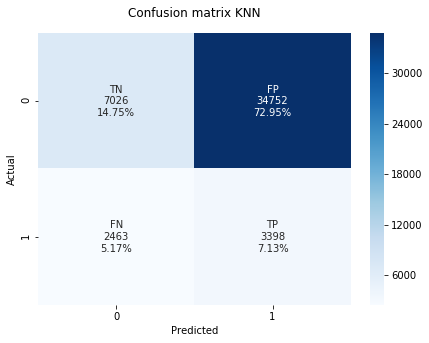

F1-Score 	: 0.15441594146917817
Recall 		: 0.579764545299437
Precision 	: 0.0890694626474443
ROC-AUC 	: 0.3739695913341936
Accuracy 	: 0.2188123176389093



In [45]:
conf_matrix_knn_test = confusion_matrix(y_data_test, hasil_knn_test)

plt.figure(figsize=(7, 5))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_knn_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_knn_test.flatten()/np.sum(conf_matrix_knn_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix_knn_test, annot=labels, xticklabels=[0,1], yticklabels=[0,1], cmap='Blues', fmt='')

    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix KNN', pad=16)
plt.show()

f1 = f1_score(y_data_test, hasil_knn_test)
recall = recall_score(y_data_test, hasil_knn_test)
precision = precision_score(y_data_test, hasil_knn_test)
roc = roc_auc_score(y_data_test, hasil_knn_test)
accuracy = accuracy_score(y_data_test, hasil_knn_test)

print("F1-Score \t:", f1)
print("Recall \t\t:", recall)
print("Precision \t:", precision)
print("ROC-AUC \t:", roc)
print("Accuracy \t:", accuracy, end="\n\n")

## Confusion Matrix Decision Tree

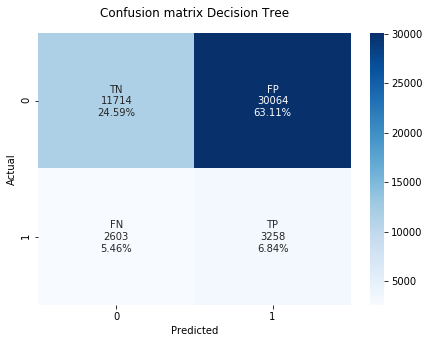

F1-Score 	: 0.16629660822295383
Recall 		: 0.5558778365466643
Precision 	: 0.09777324290258688
ROC-AUC 	: 0.41813232149991075
Accuracy 	: 0.31428031654736666



In [46]:
conf_matrix_dt_test = confusion_matrix(y_data_test, hasil_dt_test)

plt.figure(figsize=(7, 5))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in conf_matrix_dt_test.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_matrix_dt_test.flatten()/np.sum(conf_matrix_dt_test)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix_dt_test, annot=labels, xticklabels=[0,1], yticklabels=[0,1], cmap='Blues', fmt='')

    
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix Decision Tree', pad=16)
plt.show()

f1 = f1_score(y_data_test, hasil_dt_test)
recall = recall_score(y_data_test, hasil_dt_test)
precision = precision_score(y_data_test, hasil_dt_test)
roc = roc_auc_score(y_data_test, hasil_dt_test)
accuracy = accuracy_score(y_data_test, hasil_dt_test)

print("F1-Score \t:", f1)
print("Recall \t\t:", recall)
print("Precision \t:", precision)
print("ROC-AUC \t:", roc)
print("Accuracy \t:", accuracy, end="\n\n")